# OZNAL - Predikcia mŕtvice

## Autori: Norbert Varga, Krištof Zubricky

### Obsah

* [Dáta](#chapter1)
* [Prieskumná analýza](#chapter2)
    * [Základné info o dátach](#section_2_1)
	* [Analýza numerických znakov (age, bmi, avg_glucose_level)](#section_2_2)
		* [Age (Vek)](#subsection_2_2_1)
			* [Základné grafy](#subsubsection_2_2_1_1)
			* [Analýza rozdelenia](#subsubsection_2_2_1_2)
		* [BMI](#subsection_2_2_2)
			* [Základné grafy](#subsubsection_2_2_2_1)
			* [Analýza rozdelenia](#subsubsection_2_2_2_2)
		* [Avg_glucose_level (priemerná hodnota glukózy)](#subsection_2_2_3)
			* [Základné grafy](#subsubsection_2_2_3_1)
			* [Analýza rozdelenia](#subsubsection_2_2_3_2)
	* [Korelácia](#section_2_3)
	* [Hypotézy](#section_2_4)
		* [1. Hypotéza](#subsection_2_4_1)
		* [2. Hypotéza](#subsection_2_4_2)
        * [3. Hypotéza](#subsection_2_4_3)
        * [4. Hypotéza](#subsection_2_4_4)
	* [Normalizacia](#section_2_5)
		* [Transformacia na normalne rozdelenie](#subsection_2_5_1)
	* [Párová analýza](#section_2_6)
		* [Numerické VS kategorické a binárne](#subsection_2_6_1)
		* [Numerické VS numerické](#subsection_2_6_2)
		* [Kategorické a binárne VS kategorické a binárne](#subsection_2_6_3)
* [Čistenie dát pre ďalšie analýzy](#chapter3)
    * [Náhrada NA hodnoty](#section_3_1)
        * [smoking_status](#section_3_1_1)
        * [BMI](#section_3_1_2)
    * [Vytvorenie tréningového a testovacieho dátasetu](#section_3_2)
* [Štatistické učenie, zhlukové analýzy a nachádzanie vnútorných vzorcov v dátach](#chapter4)
* [Bayesovská štatistika](#chapter5)

# Dáta  <a class="anchor" id="chapter1"> </a>

Zdroj: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br> <br>
Vysvetlivky k stlpcom: <br>
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
install.packages("moments")
install.packages("dplyr")
install.packages("ggpubr")
install.packages("nortest")
install.packages("ggplot2")
install.packages('ggbeeswarm')
install.packages('ggforce')
install.packages('corrplot')
install.packages('caret')

library(ggplot2)
library(ggbeeswarm)
library(ggforce)
library(moments)
library(nortest)
library(corrplot)
library(dplyr)
library(caret)
library(MASS)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_packages
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_packages
package 'nortest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_packages
package 'ggbeeswarm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpUTFBoS\downloaded_p

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggbeeswarm' was built under R version 3.6.3"Warning message:
"package 'ggforce' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



Nacitaj data:

In [2]:
df = read.csv("./data/healthcare-dataset-stroke-data.xls")
head(df)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


# Prieskumná analýza <a class="anchor" id="chapter2"> </a>

## Základné info o dátach <a class="anchor" id="section_2_1"> </a>

Najskor nas zaujima vyskyt abnormalit ako chybajuce hodnoty alebo hodnoty ktore nie su realne. 

Z nizsie uvedeneho sumaru vidime napriklad, ze znak 'gender' ma 3 rozne kategorie, pricom sa ocakavaju len 2 a ze tretiu kategoriu ma len jedno pozorovanie. 

Dalej znak 'bmi' je uvedeny ako kategoricke data, hoci by sme ocakavali skor ciselne vyjadrenie.

In [3]:
str(df)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : Factor w/ 419 levels "10.3","11.3",..: 240 419 199 218 114 164 148 102 419 116 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

Identifikator nie je sam o sebe zaujimavy, ale ocakavame ze vsetky hodnoty tohto stlpca budu unikatne:

In [5]:
nrow(unique(df[c("id")])) == nrow(df[c("id")])

[1] TRUE

Stlpec 'gender' ma 3 unikatne hodnoty. Tretia hodnota je 'Other' a vyskytuje sa v jedinom pozorovani. Kedze sa jedna o jedine pozorovanie a nevieme pohlavie urcit, toto pozorovanie odstranime a budeme uvazovat len 2 pohlavia. 

In [6]:
unique(df[c("gender")])

,gender
1,Male
2,Female
3117,Other


In [7]:
df = df[df$gender != 'Other', ]

In [8]:
unique(df[c("gender")])

gender
Male
Female


Znak 'bmi' sa rozoznal ako kategoricky pre nerozoznane NA hodnoty. Preto ich transformujeme. Taktiez kategoriu 'Unknown' v znaku 'smoking_status' mozeme previest na NA pre konzistenciu.

In [9]:
df[] <- lapply(df, function(x) {
    is.na(levels(x)) <- levels(x) == "N/A"
    x
})

df[] <- lapply(df, function(x) {
    is.na(levels(x)) <- levels(x) == "Unknown"
    x
})

Teraz sa vieme pozriet, kde mame NA:

In [10]:
apply(df, 2, function(x) any(is.na(x)))

id            gender               age      hypertension 
            FALSE             FALSE             FALSE             FALSE 
    heart_disease      ever_married         work_type    Residence_type 
            FALSE             FALSE             FALSE             FALSE 
avg_glucose_level               bmi    smoking_status            stroke 
            FALSE              TRUE              TRUE             FALSE

In [11]:
df['bmi'] = sapply(df['bmi'], as.character)
df['bmi'] = sapply(df['bmi'], as.numeric)

In [12]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17740   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36922   Other :   0   Median :45.00   Median :0.00000  
 Mean   :36514                 Mean   :43.23   Mean   :0.09748  
 3rd Qu.:54643                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1756     children     : 687   Rural:2513    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05402                Private      :2924                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

In [13]:
#df$stroke[df$stroke==0] <- "No"
#df$stroke[df$stroke==1] <- "Yes"

#df$hypertension[df$hypertension==0] <- "No"
#df$hypertension[df$hypertension==1] <- "Yes"

#df$heart_disease[df$heart_disease==0] <- "No"
#df$heart_disease[df$heart_disease==1] <- "Yes"

Máme teda 3 numerické atribúty, 5 kategorických a 3 binárne. Prakticky by sme vedeli atribúty gender, ever_married a Residence_type zmeniť tiež na binárne.  

In [14]:
modus <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

## Analýza numerických znakov (age, bmi, avg_glucose_level) <a class="anchor" id="section_2_2"></a>

### Age (Vek): <a class="anchor" id="subsection_2_2_1"></a>
Hoci nasledovné hodnoty máme vypočítané už vyššie, uvádzame ich ešte raz pre úplnosť, ako aj kvôli overeniu ich správnosti:

In [15]:
print(paste("Počet: ", toString(NROW(df$age))))
print(paste("Minimum: ", toString(min(df$age))))
print(paste("Maximum: ", toString(max(df$age))))
print(paste("Priemer: ", toString(apply(df['age'], 2, mean))))
print(paste("Medián: ", toString(apply(df['age'], 2, median))))
print(paste("Modus: ", toString(apply(df['age'], 2, modus))))
print(paste("Rozptyl: ", toString(var(df$age))))
print(paste("Smerodajná odchýlka: ", toString(sd(df$age))))
print(paste("Koeficient asymetrie: ", toString(skewness(df$age))))
print(paste("Špicatosť: ", toString(kurtosis(df$age))))
print("Kvantily: ")
quantile(df$age)

[1] "Pocet:  5109"
[1] "Minimum:  0.08"
[1] "Maximum:  82"
[1] "Priemer:  43.2299862986886"
[1] "Medián:  45"
[1] "Modus:  78"
[1] "Rozptyl:  511.373788194801"
[1] "Smerodajná odchýlka:  22.6135753076509"
[1] "Koeficient asymetrie:  -0.137389839898049"
[1] "Špicatost:  2.00886445297715"
[1] "Kvantily: "


0%   25%   50%   75%  100% 
 0.08 25.00 45.00 61.00 82.00

Počet riadkov je nad 5100, najmladší respondent má len 0.08 rokov, teda je ešte novorodenec. Najstarší človek v datasete má 82 rokov, priemerný vek je 43 rokov, stredná hodnota je 45, najčastejšie sa vyskytujúca hodnota je 78. Rozptyl je  511.37, smerodajná odchýlka je  22.6, koeficient asymetrie je -0.13, teda naľavo od priemeru sa vyskytujú vzdialenejšie hodnoty ako napravo a väčšina hodnôt sa nachádza viac vpravo od priemeru. Špicatosť je 2, teda je špicatejší ako krivka normálneho rozdelenia.

#### Základné grafy  <a class="anchor" id="subsubsection_2_2_1_1"></a>

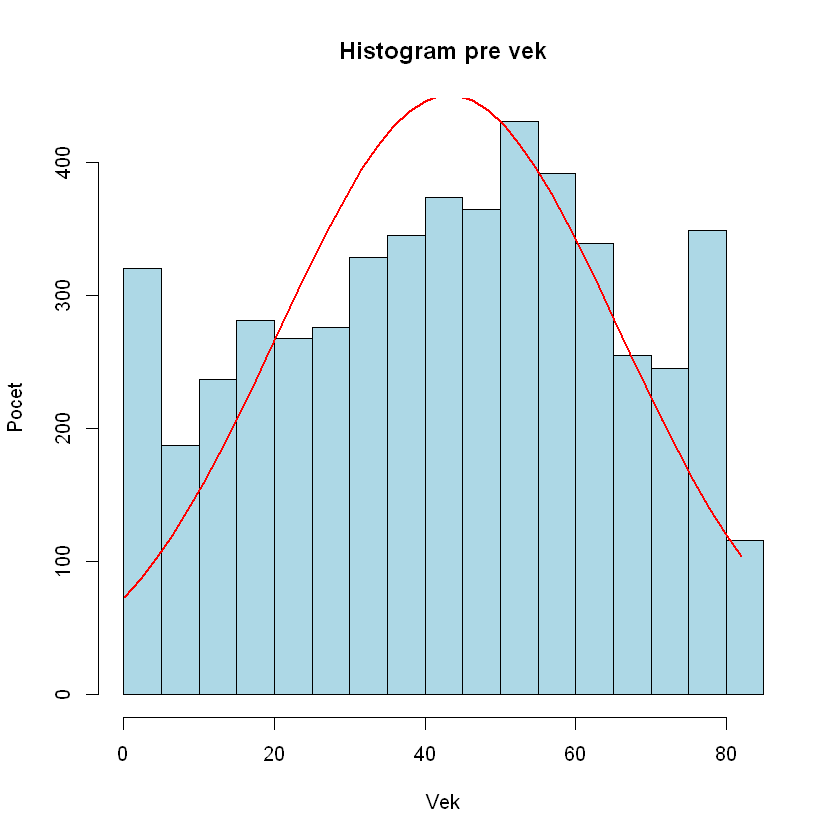

In [16]:
h <- hist(df$age
    , xlab="Vek"
    , ylab="Pocet"
    , main="Histogram pre vek"
    , col="lightblue")

df_age <- df$age
xfit<-seq(min(df_age),max(df_age),length=40)
yfit<-dnorm(xfit,mean=mean(df_age),sd=sd(df_age))
yfit <- yfit*diff(h$mids[1:2])*length(df_age)
lines(xfit, yfit, col="red", lwd=2) 

Na grafe môžeme vidieť, že veľa hodnôt je zhromaždených na začiatku, v strede a na konci. Z toho môže predpokladať, že vek nebude normálne rozdelený.

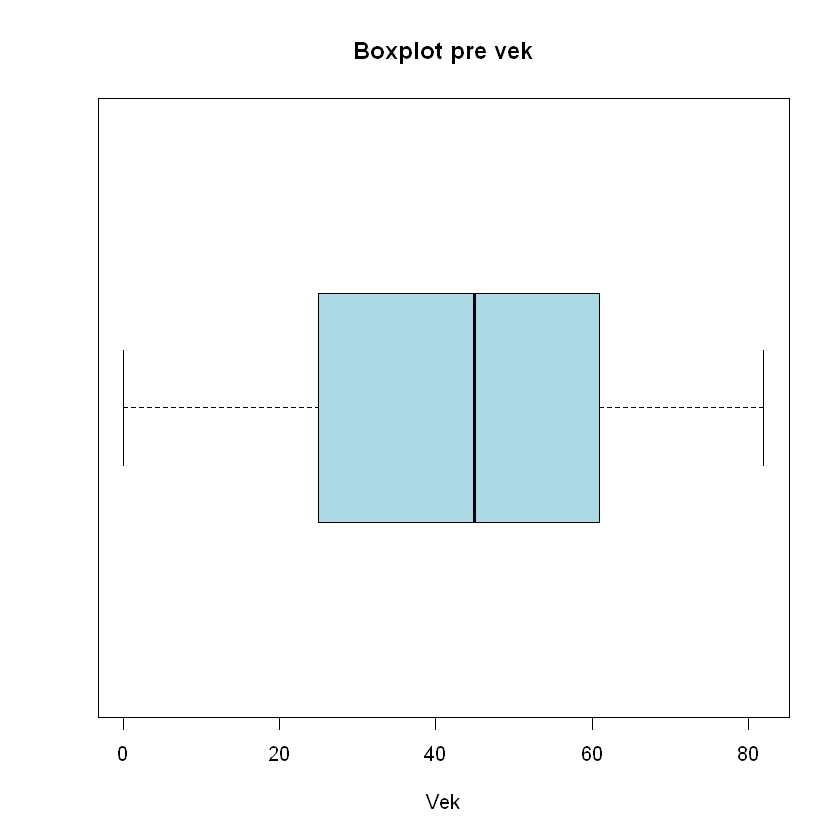

In [17]:
boxplot(df$age, horizontal=TRUE, xlab="Vek", main="Boxplot pre vek", col="lightblue")

Podľa boxplotu sa pri veku nenachádzajú vychýlené hodnoty a medián je posunutý trošku vpravo. 

#### Analýza rozdelenia  <a class="anchor" id="subsubsection_2_2_1_2"></a>

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

Q-Q plot

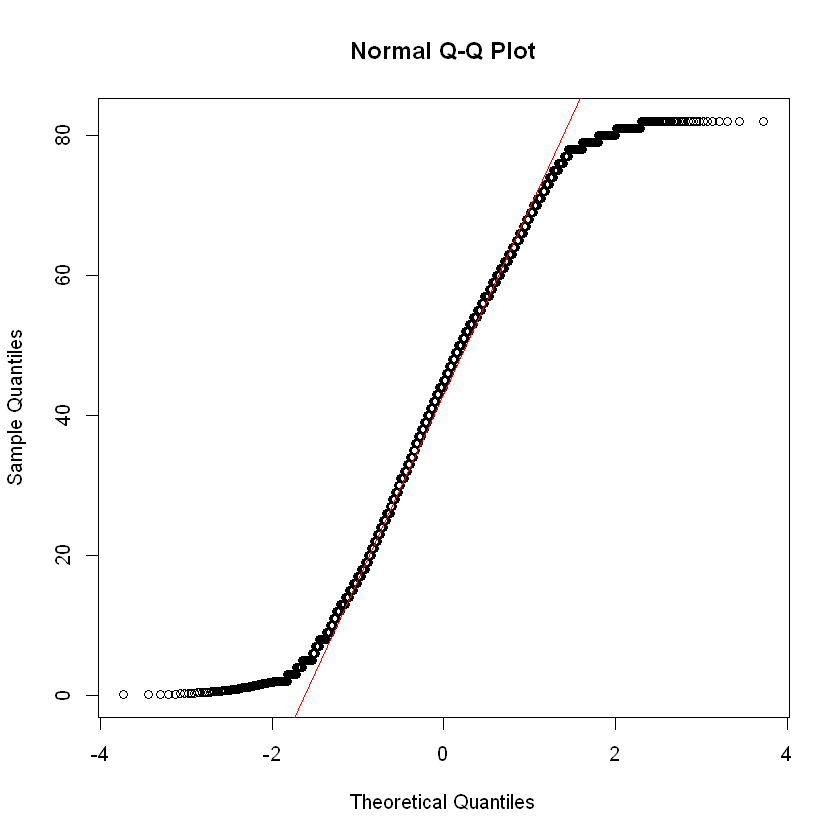

In [18]:
qqnorm(df$age)
qqline(df$age, col = 2)

Na grafe vidíme, že sa rozdelenie veku väčšinou zhoduje s normálnym rozdelením, ale na oboch  koncoch sa výrazne líšia. Toto potvrdzuje naše predvídanie, že dáta nebudú normálne rozdelené. 

In [19]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(df$age[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  df$age[0:5000]
W = 0.96693, p-value < 2.2e-16


In [20]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  2.058166e-32 
[1] "Zamietame H0, data nie su z norm. rozd."


In [21]:
#Anderson-Darling normality test
ad_test <- ad.test(df$age)

In [22]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


Keďže nám vyšla hodnota „p“ menšia ako 0.05 pri Shapiro-Wilk teste a Anderson-Darling teste, zamietame hypotézu H0, že dáta sú normálne rozdelené. 

### BMI  <a class="anchor" id="subsection_2_2_2"></a>

In [23]:
#remove NA
bmi_no_na <- na.omit(df$bmi)

In [24]:
print(paste("Počet: ", toString(NROW(bmi_no_na))))
print(paste("Minimum: ", toString(min(bmi_no_na))))
print(paste("Maximum: ", toString(max(bmi_no_na))))
print(paste("Priemer: ", toString(apply(bmi_no_na, 2, mean))))
print(paste("Medián: ", toString(apply(bmi_no_na, 2, median))))
print(paste("Modus: ", toString(apply(bmi_no_na, 2, modus))))
print(paste("Rozptyl: ", toString(var(bmi_no_na))))
print(paste("Smerodajná odchýlka: ", toString(sd(bmi_no_na))))
print(paste("Koeficient asymetrie: ", toString(skewness(bmi_no_na))))
print(paste("Špicatosť: ", toString(kurtosis(bmi_no_na))))
print("Kvantily: ")
quantile(bmi_no_na)

[1] "Pocet:  4908"
[1] "Minimum:  10.3"
[1] "Maximum:  97.6"
[1] "Priemer:  28.8945599022005"
[1] "Medián:  28.1"
[1] "Modus:  28.7"
[1] "Rozptyl:  61.6903412980209"
[1] "Smerodajná odchýlka:  7.85431991314467"
[1] "Koeficient asymetrie:  1.05474046966251"
[1] "Špicatost:  6.35768309160711"
[1] "Kvantily: "


0%  25%  50%  75% 100% 
10.3 23.5 28.1 33.1 97.6

Počet riadkov, ktoré neobsahujú NA hodnoty je 4908, minimálna hodnota je 10.3, maximálna hodnota je 97.6. Priemerný BMI index je 28.8, stredná hodnota je 28.9, najčastejšie sa vyskytujúca hodnota je 28.7. Rozptyl je 61.7, smerodajná odchýlka je 7.85, koeficient asymetrie je 1.05, teda napravo od priemeru sa vyskytujú vzdialenejšie hodnoty ako naľavo a väčšina hodnôt sa nachádza viac vľavo od priemeru. Špicatosť je 6.36, teda je špicatejší ako krivka normálneho rozdelenia.

#### Základné grafy <a class="anchor" id="subsubsection_2_2_2_1"></a>

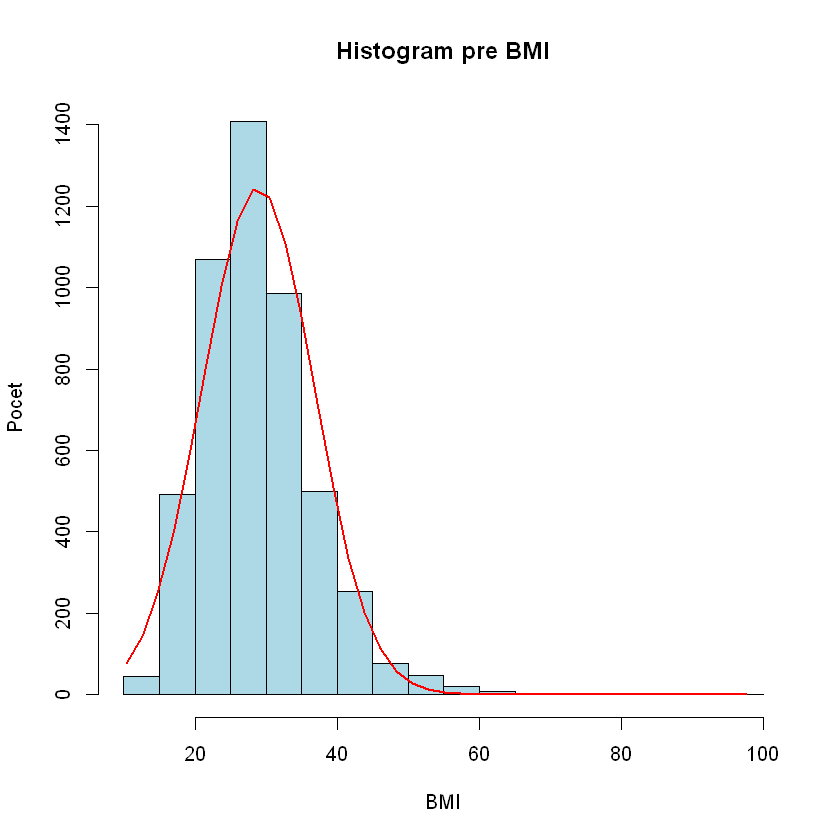

In [25]:
h <- hist(bmi_no_na
    , xlab="BMI"
    , ylab="Pocet"
    , main="Histogram pre BMI"
    , col="lightblue")

xfit<-seq(min(bmi_no_na),max(bmi_no_na),length=40)
yfit<-dnorm(xfit,mean=mean(bmi_no_na),sd=sd(bmi_no_na))
yfit <- yfit*diff(h$mids[1:2])*length(bmi_no_na)
lines(xfit, yfit, col="red", lwd=2) 

Na grafe môžeme vidieť, že veľa hodnôt je zhromaždených vľavo, celý graf je posunutý doľava. Z toho môže predpokladať, že BMI nebude normálne rozdelený.

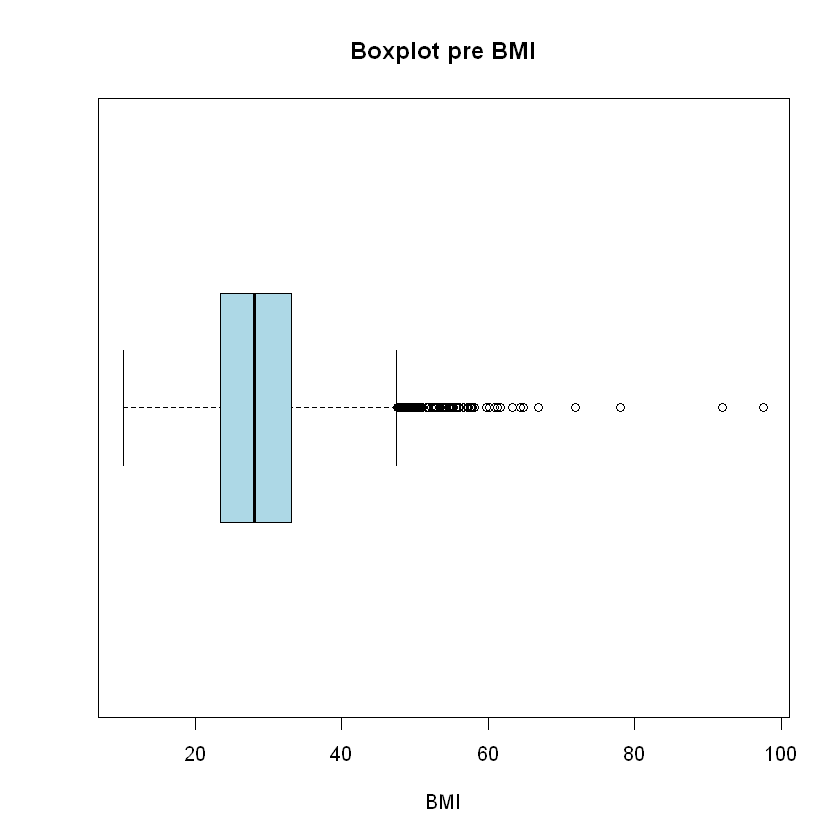

In [26]:
boxplot(bmi_no_na, horizontal=TRUE, xlab="BMI", main="Boxplot pre BMI", col="lightblue")

Podľa boxplotu sa pri BMI nachádzajú aj outsideri, ktorých je mnoho. 

#### Analýza rozdelenia <a class="anchor" id="subsubsection_2_2_2_2"></a>

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

Q-Q plot

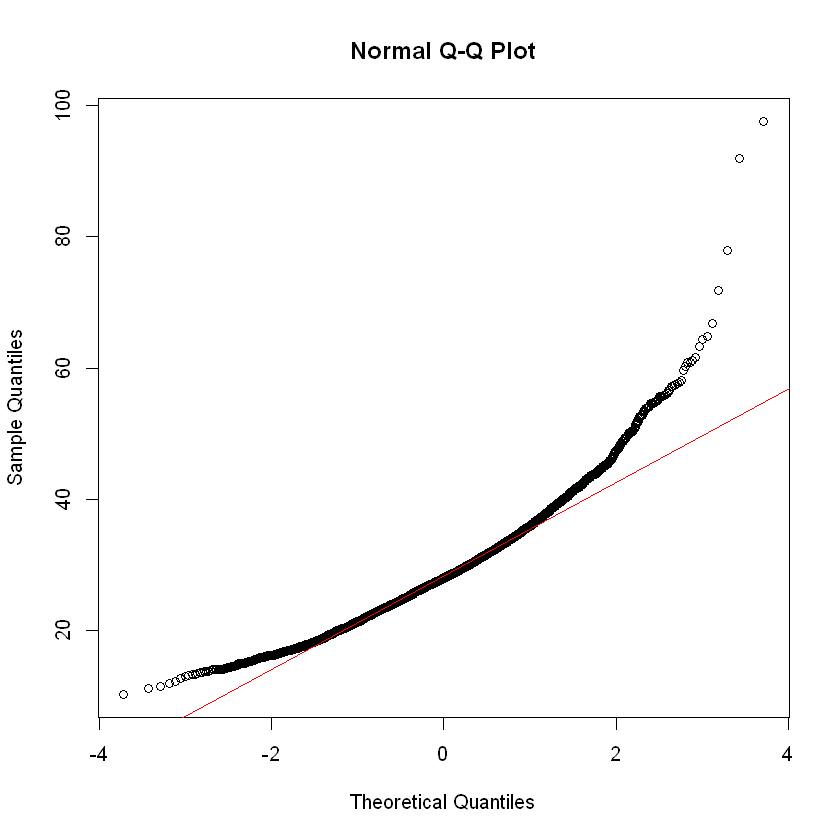

In [27]:
qqnorm(bmi_no_na)
qqline(bmi_no_na, col = 2)

Na grafe vidíme, že sa rozdelenie BMI indexu zhoduje len v strede s normálnym rozdelením. Toto potvrdzuje naše predvídanie, že dáta nebudú normálne rozdelené. 

In [28]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(bmi_no_na[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  bmi_no_na[0:5000]
W = 0.95357, p-value < 2.2e-16


In [29]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  6.759068e-37 
[1] "Zamietame H0, data nie su z norm. rozd."


In [30]:
#Anderson-Darling normality test
ad_test <- ad.test(bmi_no_na)

In [31]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


Keďže nám vyšla hodnota „p“ menšia ako 0.05 pri Shapiro-Wilk teste a Anderson-Darling teste, zamietame hypotézu H0, že dáta sú normálne rozdelené. 

### Avg_glucose_level (priemerná hodnota glukózy) <a class="anchor" id="subsection_2_2_3"></a>

In [32]:
print(paste("Počet: ", toString(NROW(df$avg_glucose_level))))
print(paste("Minimum: ", toString(min(df$avg_glucose_level))))
print(paste("Maximum: ", toString(max(df$avg_glucose_level))))
print(paste("Priemer: ", toString(apply(df['avg_glucose_level'], 2, mean))))
print(paste("Medián: ", toString(apply(df['avg_glucose_level'], 2, median))))
print(paste("Modus: ", toString(apply(df['avg_glucose_level'], 2, modus))))
print(paste("Rozptyl: ", toString(var(df$avg_glucose_level))))
print(paste("Smerodajná odchýlka: ", toString(sd(df$avg_glucose_level))))
print(paste("Koeficient asymetrie: ", toString(skewness(df$avg_glucose_level))))
print(paste("Špicatosť: ", toString(kurtosis(df$avg_glucose_level))))
print("Kvantily: ")
quantile(df$avg_glucose_level)

[1] "Pocet:  5109"
[1] "Minimum:  55.12"
[1] "Maximum:  271.74"
[1] "Priemer:  106.140399295361"
[1] "Medián:  91.88"
[1] "Modus:  93.88"
[1] "Rozptyl:  2050.73155700576"
[1] "Smerodajná odchýlka:  45.2850036657364"
[1] "Koeficient asymetrie:  1.57235351298891"
[1] "Špicatost:  4.67890189554881"
[1] "Kvantily: "


0%    25%    50%    75%   100% 
 55.12  77.24  91.88 114.09 271.74

Počet riadkov je 5109, minimálna priemerná hodnota glukózy je 55.12, maximálna hodnota je 271.74. Priemerný hodnota je 106.14, medián je 91.88, najčastejšie sa vyskytujúca hodnota je 93.88. Rozptyl je 2050.73, smerodajná odchýlka je 45.29, koeficient asymetrie je 1.57, teda napravo od priemeru sa vyskytujú vzdialenejšie hodnoty ako naľavo a väčšina hodnôt sa nachádza viac vľavo od priemeru. Špicatosť je 4.68, teda je špicatejší ako krivka normálneho rozdelenia.

#### Základné grafy <a class="anchor" id="subsubsection_2_2_3_1"></a>

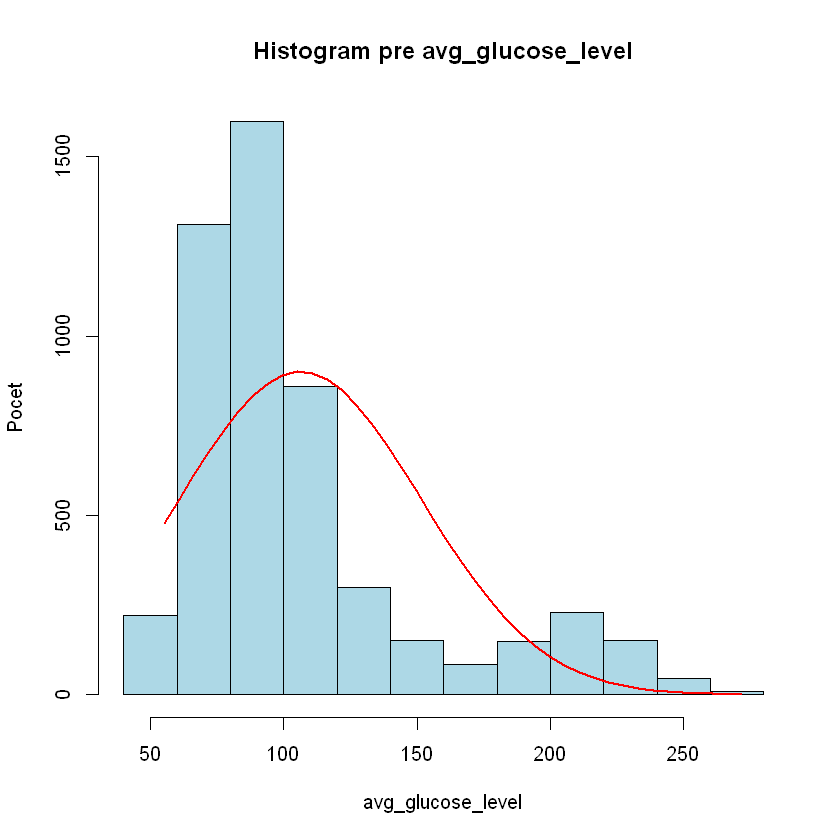

In [33]:
h <- hist(df$avg_glucose_level
    , xlab="avg_glucose_level"
    , ylab="Pocet"
    , main="Histogram pre avg_glucose_level"
    , col="lightblue")

df_agl <- df$avg_glucose_level
xfit<-seq(min(df_agl),max(df_agl),length=40)
yfit<-dnorm(xfit,mean=mean(df_agl),sd=sd(df_agl))
yfit <- yfit*diff(h$mids[1:2])*length(df_agl)
lines(xfit, yfit, col="red", lwd=2) 



Na grafe môžeme vidieť, že veľa hodnôt je zhromaždených vľavo, celý graf je posunutý doľava. Z toho môže predpokladať, že hodnota glukózy nebude normálne rozdelená.

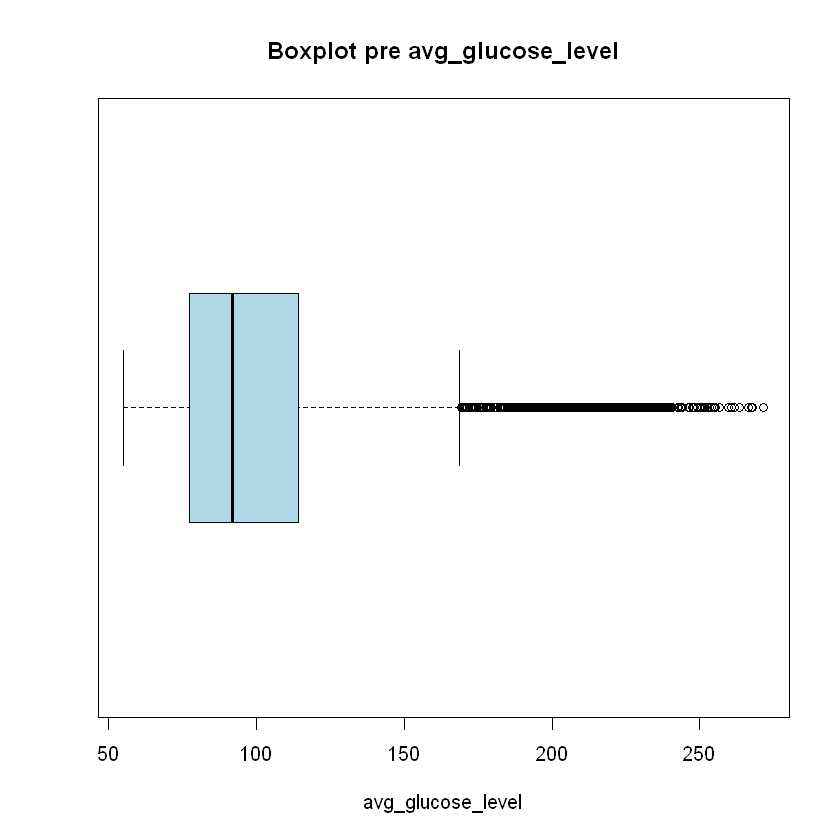

In [34]:
boxplot(df$avg_glucose_level, horizontal=TRUE, xlab="avg_glucose_level", main="Boxplot pre avg_glucose_level", col="lightblue")

Podľa boxplotu sa pri glukózy nachádzajú aj outsideri, ktorých je mnoho. 

#### Analýza rozdelenia <a class="anchor" id="subsubsection_2_2_3_2"></a>

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

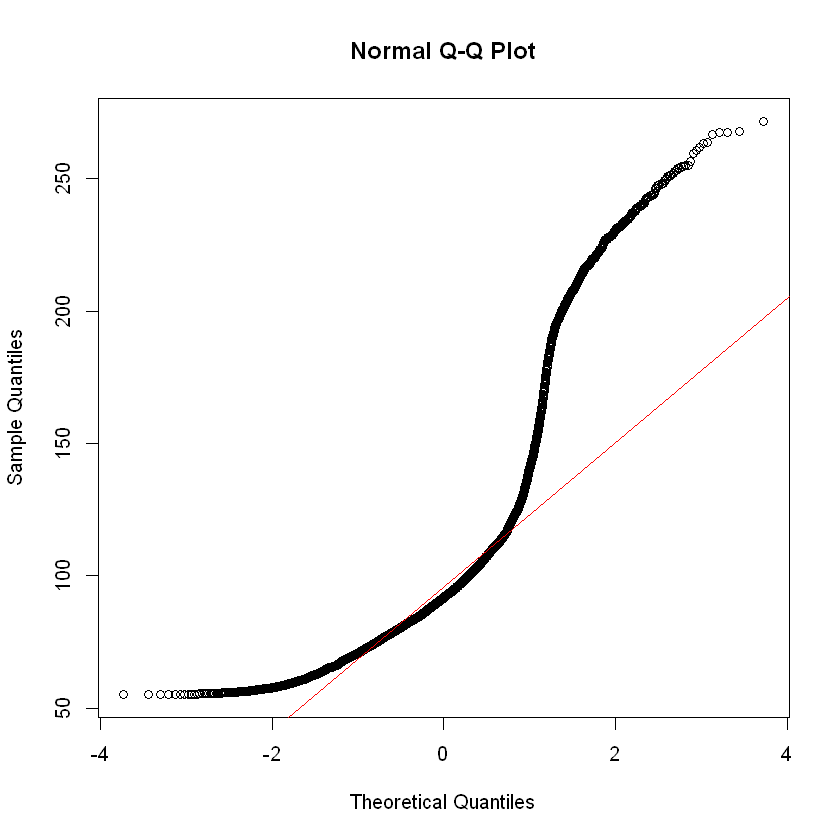

In [35]:
qqnorm(df$avg_glucose_level)
qqline(df$avg_glucose_level, col = 2)

Na grafe vidíme, že rozdelenie glukózy sa zhoduje len v krátkom úseku s normálnym rozdelením. Toto potvrdzuje naše predvídanie, že dáta nebudú normálne rozdelené. 

In [36]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(df$avg_glucose_level[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  df$avg_glucose_level[0:5000]
W = 0.80521, p-value < 2.2e-16


In [37]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  4.314657e-61 
[1] "Zamietame H0, data nie su z norm. rozd."


In [38]:
#Anderson-Darling normality test
ad_test <- ad.test(df$avg_glucose_level)

In [39]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


Keďže nám vyšla hodnota „p“ menšia ako 0.05 pri Shapiro-Wilk teste a Anderson-Darling teste, zamietame hypotézu H0, že dáta sú normálne rozdelené. 

## Korelácia  <a class="anchor" id="section_2_3"></a>

In [40]:
dmy <- dummyVars(" ~ .", data = df)
trsf <- data.frame(predict(dmy, newdata = df))

In [41]:
correlation <- cor(dplyr::select(trsf, age, avg_glucose_level, gender.Male, gender.Female, stroke, bmi, hypertension
                          , heart_disease, ever_married.No, ever_married.Yes ), use="pairwise.complete.obs")
correlation

,age,avg_glucose_level,gender.Male,gender.Female,stroke,bmi,hypertension,heart_disease,ever_married.No,ever_married.Yes
age,1.0000000,0.23832284,-0.02775180,0.02775180,0.24523876,0.33331422,0.27636725,0.26377674,-0.67908441,0.67908441
avg_glucose_level,0.2383228,1.00000000,0.05472209,-0.05472209,0.13199119,0.17567174,0.17453999,0.16190733,-0.15532909,0.15532909
gender.Male,-0.0277518,0.05472209,1.00000000,-1.00000000,0.00908060,-0.02616387,0.02122294,0.08568453,0.03017124,-0.03017124
gender.Female,0.0277518,-0.05472209,-1.00000000,1.00000000,-0.00908060,0.02616387,-0.02122294,-0.08568453,-0.03017124,0.03017124
stroke,0.2452388,0.13199119,0.00908060,-0.00908060,1.00000000,0.04234128,0.12789126,0.13490484,-0.10829932,0.10829932
bmi,0.3333142,0.17567174,-0.02616387,0.02616387,0.04234128,1.00000000,0.16777042,0.04132210,-0.34155289,0.34155289
hypertension,0.2763672,0.17453999,0.02122294,-0.02122294,0.12789126,0.16777042,1.00000000,0.10829246,-0.16418664,0.16418664
heart_disease,0.2637767,0.16190733,0.08568453,-0.08568453,0.13490484,0.04132210,0.10829246,1.00000000,-0.11460150,0.11460150
ever_married.No,-0.6790844,-0.15532909,0.03017124,-0.03017124,-0.10829932,-0.34155289,-0.16418664,-0.11460150,1.00000000,-1.00000000
ever_married.Yes,0.6790844,0.15532909,-0.03017124,0.03017124,0.10829932,0.34155289,0.16418664,0.11460150,-1.00000000,1.00000000


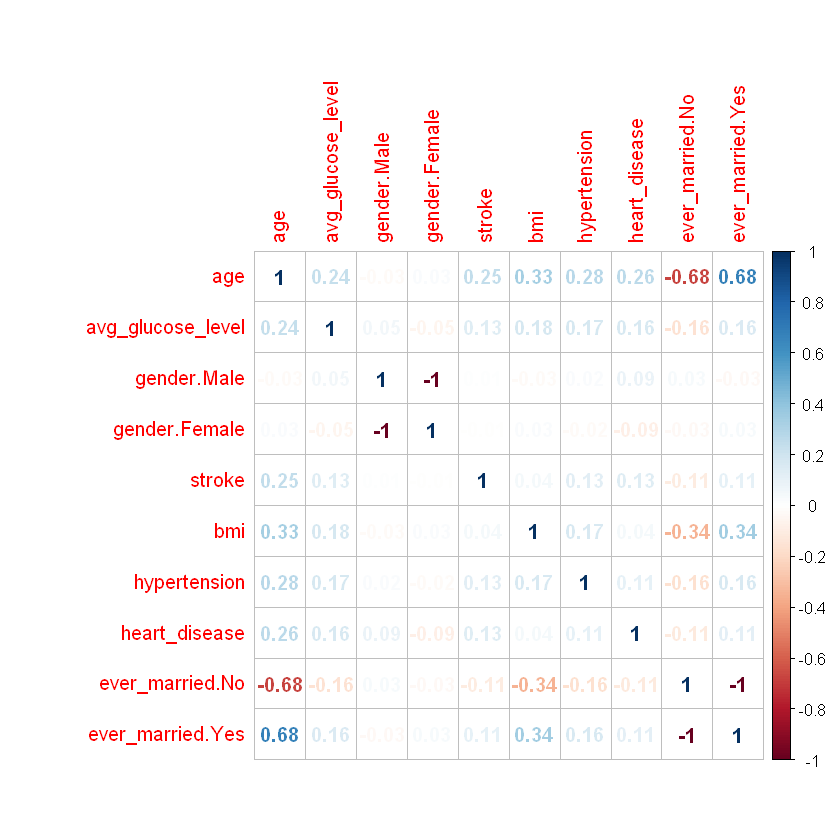

In [42]:
corrplot(correlation, method = "number") 

## Hypotézy  <a class="anchor" id="section_2_4"></a>

### 1. Hypotéza <a class="anchor" id="subsection_2_4_1"></a> <br>


H0: Kým je človek starší, tým je väčšia pravdepodobnosť na mozgovú mŕtvicu, teda vek ovplyvňuje mozgovú mŕtvicu. <br>
H1: Vek neovplyvňuje mozgovú mŕtvicu. <br>

    

### 2. Hypotéza  <a class="anchor" id="subsection_2_4_2"></a> <br>


H0: BMI ovplyvňuje mozgovú mŕtvicu. <br>
H1: BMI neovplyvňuje mozgovú mŕtvicu. <br>
    


### 3. Hypotéza  <a class="anchor" id="subsection_2_4_3"></a> <br>


H0: Je väčšia pravdepodobnosť výskytu mozgovej mŕtvice u ľudí, ktorí sú v manželstve.<br>
H1: Manželstvo neovplyvňuje mozgovú mŕtvicu. <br>
    


### 4. Hypotéza  <a class="anchor" id="subsection_2_4_4"></a> <br>


H0: Vysoký krvný tlak ovplyvňuje mozgovú mŕtvicu. <br>
H1: Vysoký krvný tlak neovplyvňuje mozgovú mŕtvicu. <br>
    


NA vo fajčení sú hlavne deti - do 10 rokov nefajčili   

## Normalizacia  <a class="anchor" id="section_2_5"></a>

 https://medium.com/swlh/data-normalisation-with-r-6ef1d1947970

### Transformacia na normalne rozdelenie <a class="anchor" id="subsection_2_5_1"></a>

https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r/

In [43]:
#znamienko pred skewness a jej absolutna hodnota nam povedia aku metodu pre transformaciu pouzit

skewness(df$bmi, na.rm = TRUE)
skewness(df$age, na.rm = TRUE)
skewness(df$avg_glucose_level, na.rm = TRUE)

bmi 
1.05474

[1] -0.1373898

[1] 1.572354

In [44]:
#age nevieme znasilnit nasledovnymi metodami, ma ale pomerne malu sikmost

#age = log10(max(df$age+1) - df$age)
#age = 1/(max(df$age+1) - df$age)
#age = sqrt(max(df$age+1) - df$age)

#takze age zatial nechame
age = df$age

#bmi je miernejsie, takze log10 je zda sa ok
bmi = log10(df$bmi)

#glukoza je prudka, takze 1/x, ale vysledok aj tak nie je idealny
avg_glucose_level = 1/df$avg_glucose_level

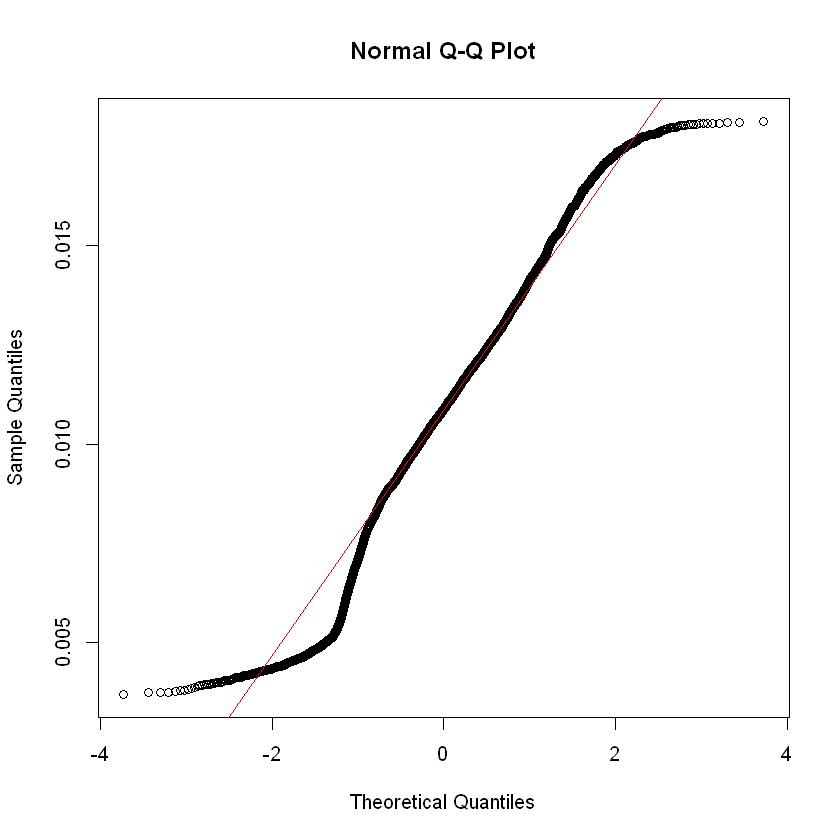

In [45]:
qqnorm(avg_glucose_level)
qqline(avg_glucose_level, col = 2)

nahrad v DF stlpce transformaciami

In [46]:
df$age = age
df$avg_glucose_level = avg_glucose_level
df$bmi = bmi

## Párová analýza <a class="anchor" id="section_2_6"></a>

### Numerické VS kategorické a binárne  <a class="anchor" id="subsection_2_6_1"></a>

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

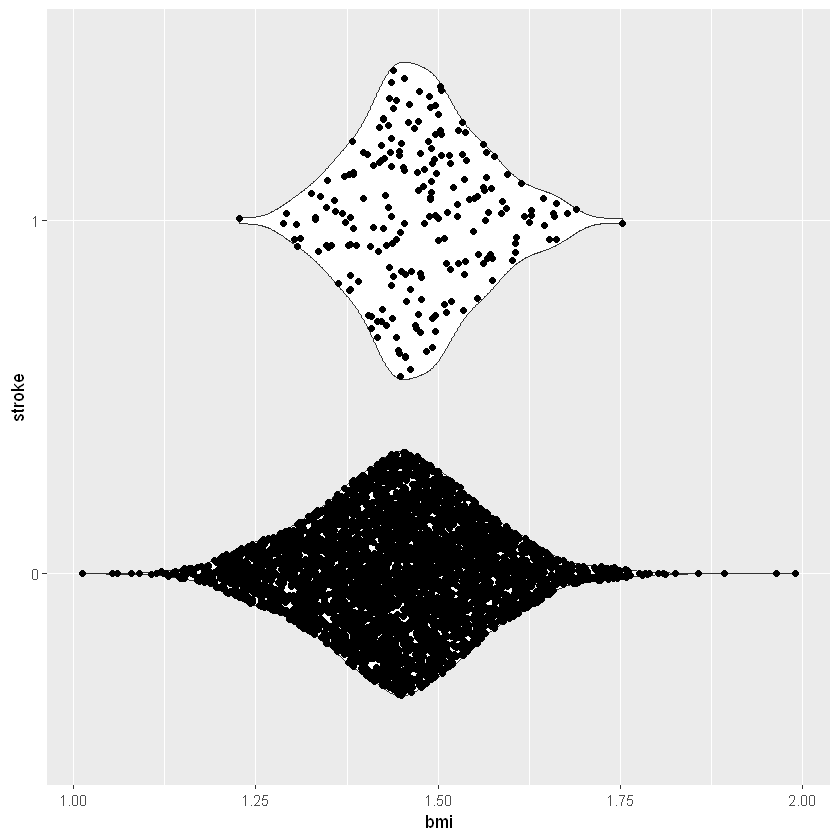

In [47]:
bmi_compare = function(df, categoric, namecat) {
    ggplot(data = df) +
      aes(y = bmi, x = categoric) +
      labs(y="bmi", x = namecat) +
      geom_violin() +
      geom_sina() +
      coord_flip()
}

#bmi_compare(df, df$gender,"gender")
#bmi_compare(df, df$ever_married,"ever_married")
#bmi_compare(df, as.factor(df$hypertension),"hypertension")
#bmi_compare(df, as.factor(df$heart_disease),"heart_disease")
#bmi_compare(df, df$work_type,"work_type")
#bmi_compare(df, df$Residence_type,"Residence_type")
#bmi_compare(df, df$smoking_status,"smoking_status")
bmi_compare(df, as.factor(df$stroke),"stroke")

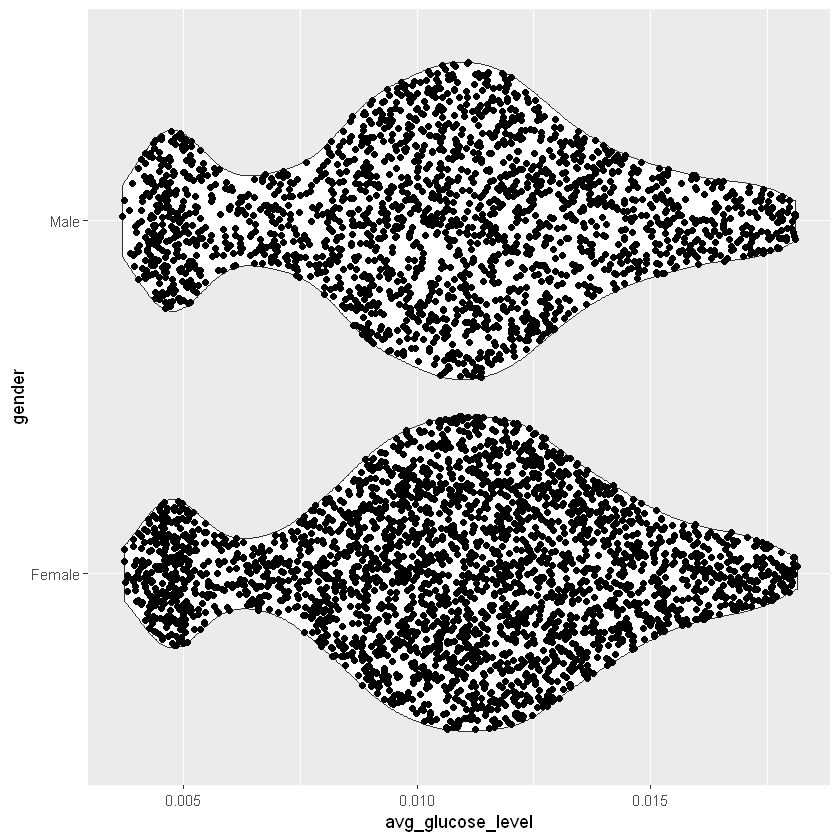

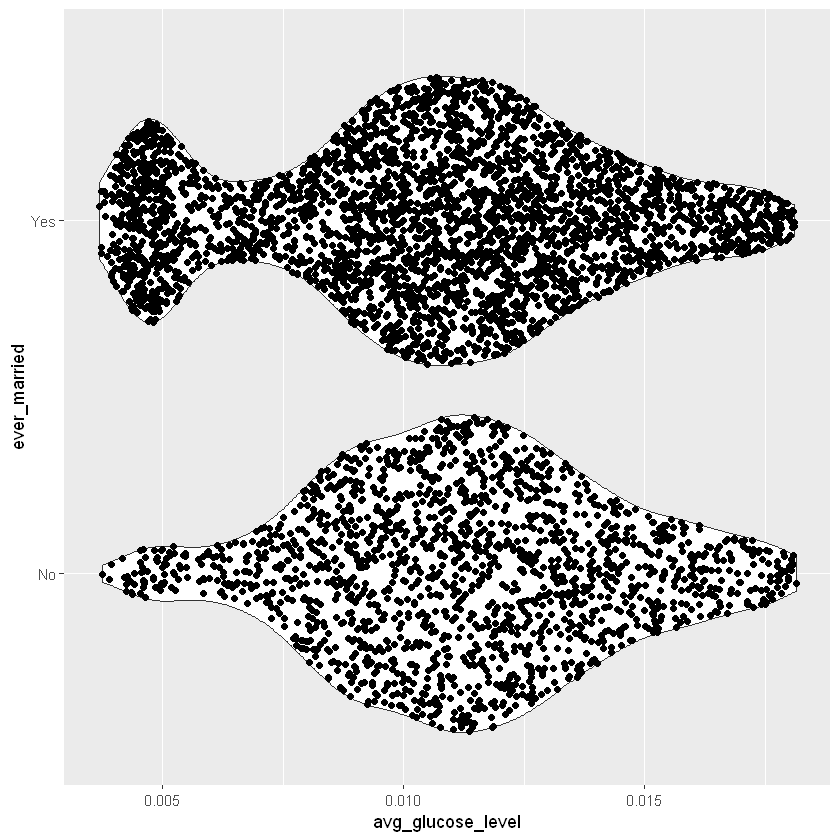

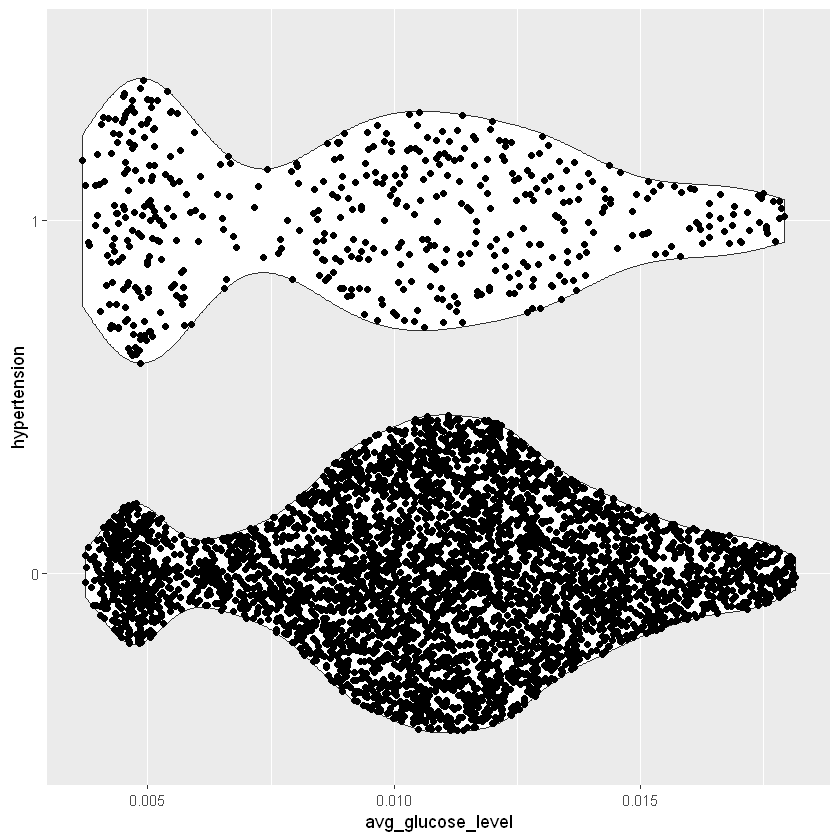

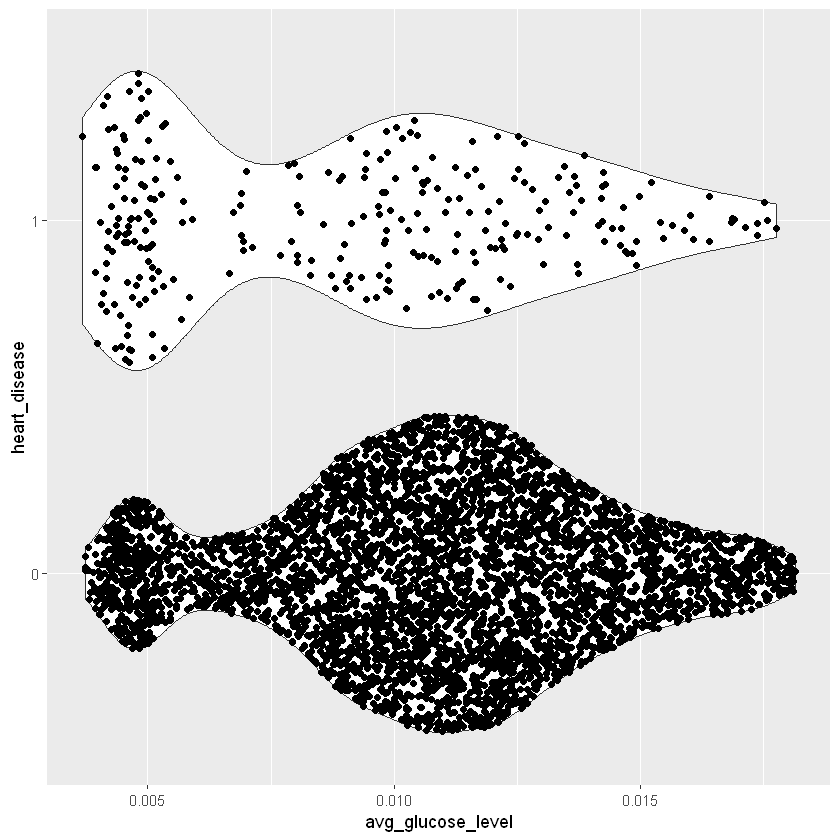

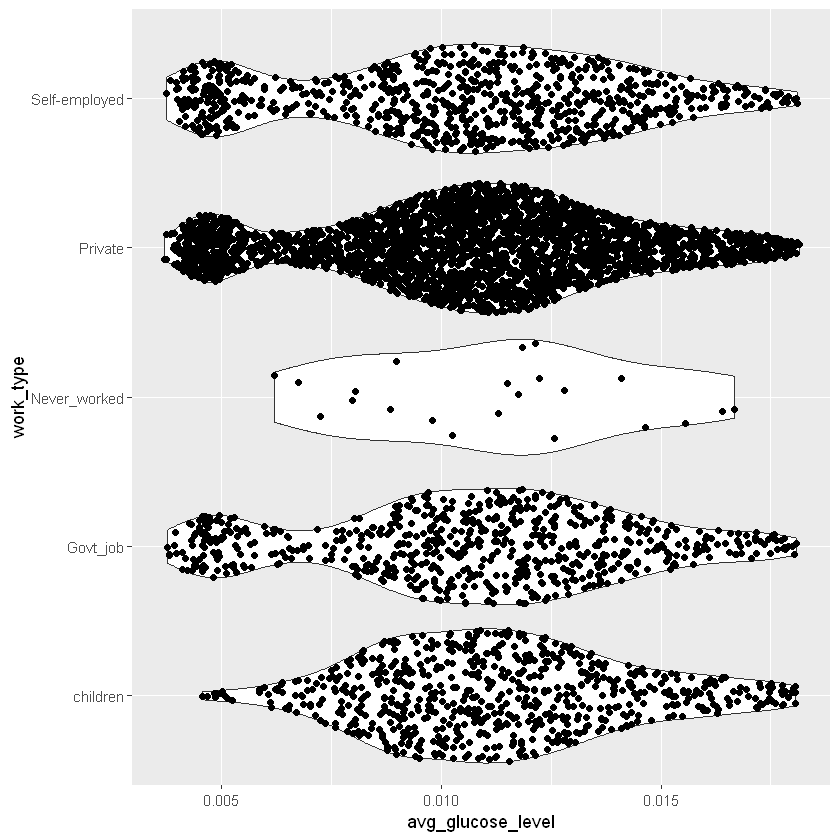

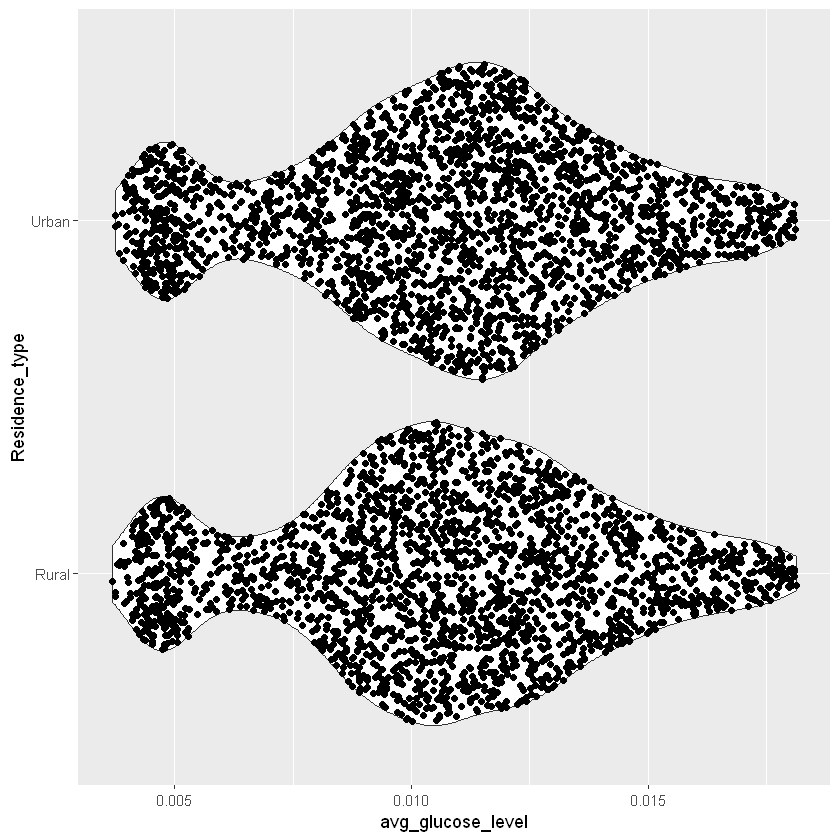

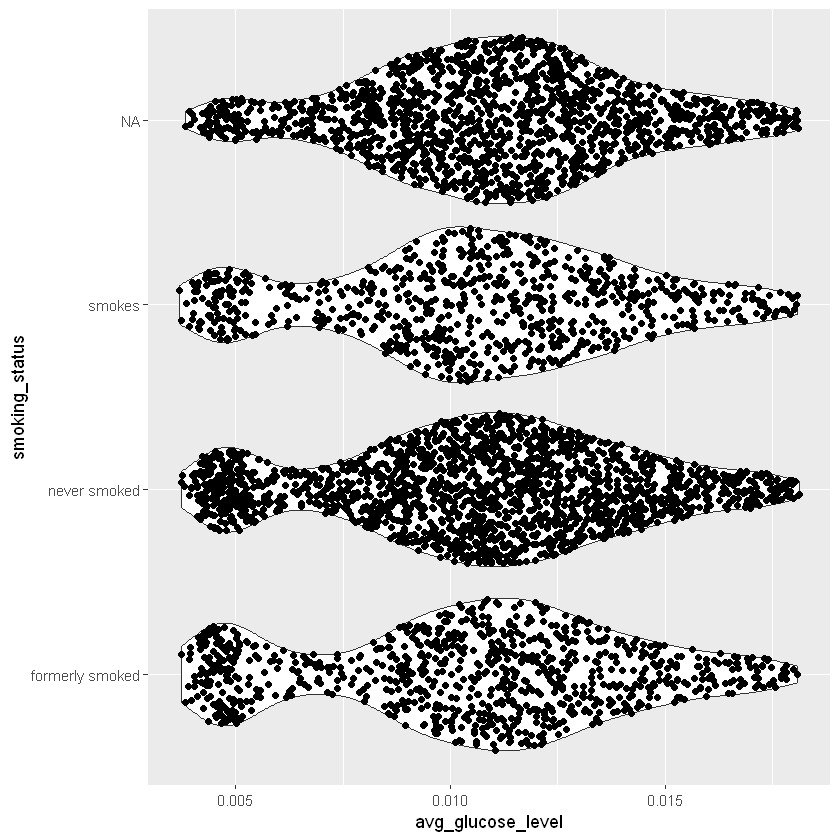

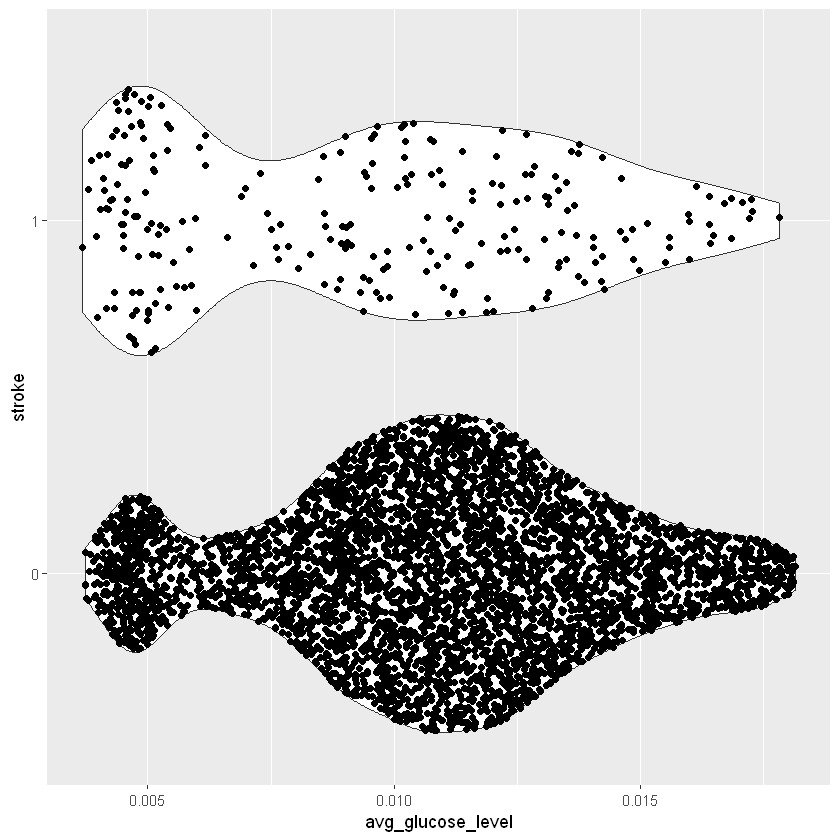

In [48]:
glucose_compare = function(df, categoric, namecat) {
    ggplot(data = df) +
      aes(y = avg_glucose_level, x = categoric) +
      labs(y="avg_glucose_level", x = namecat) +
       geom_violin() +
      geom_sina() +
      coord_flip()
}

glucose_compare(df, df$gender,"gender")
glucose_compare(df, df$ever_married,"ever_married")
glucose_compare(df, as.factor(df$hypertension),"hypertension")
glucose_compare(df, as.factor(df$heart_disease),"heart_disease")
glucose_compare(df, df$work_type,"work_type")
glucose_compare(df, df$Residence_type,"Residence_type")
glucose_compare(df, df$smoking_status,"smoking_status")
glucose_compare(df, as.factor(df$stroke),"stroke")

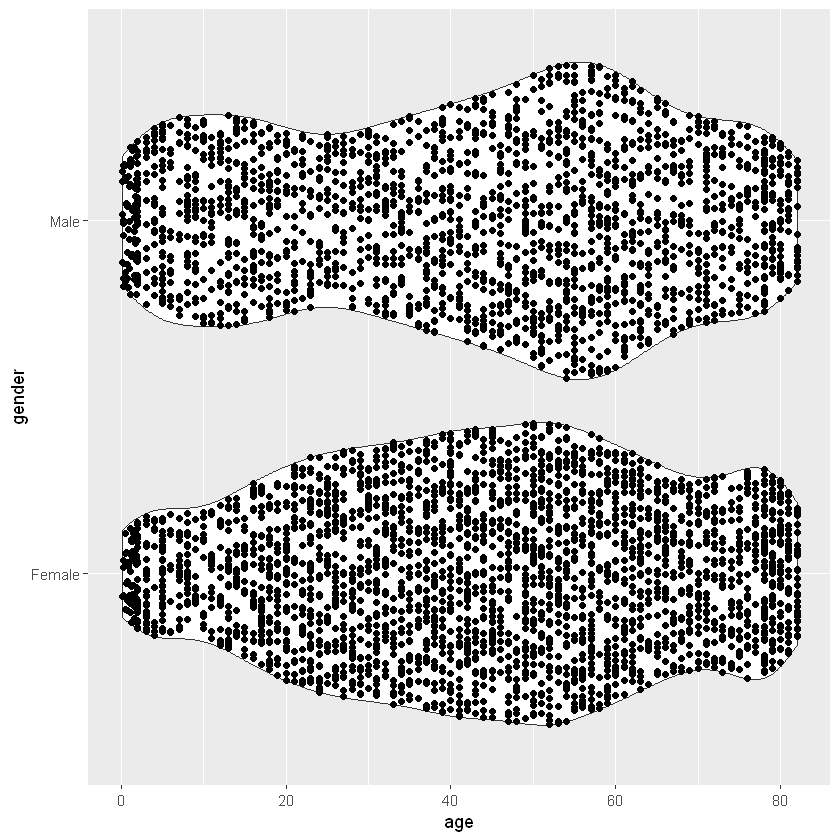

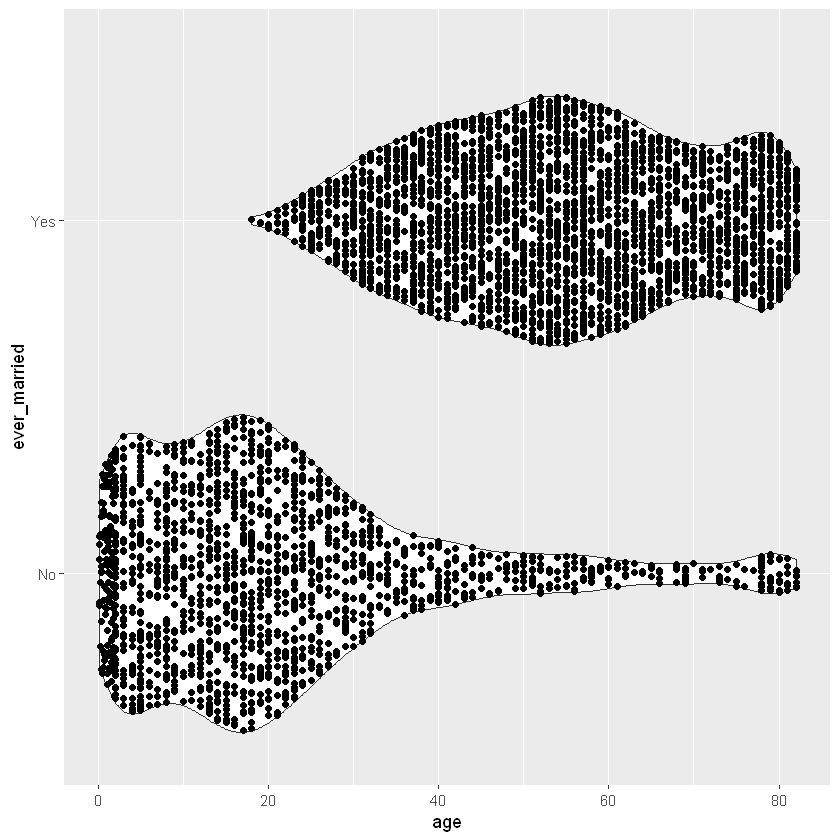

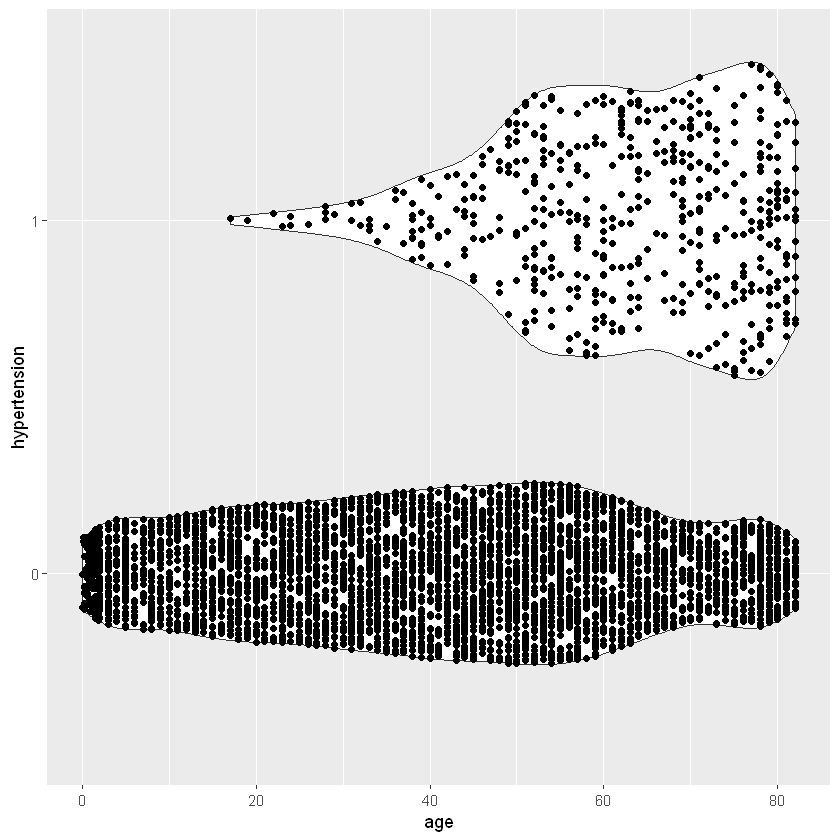

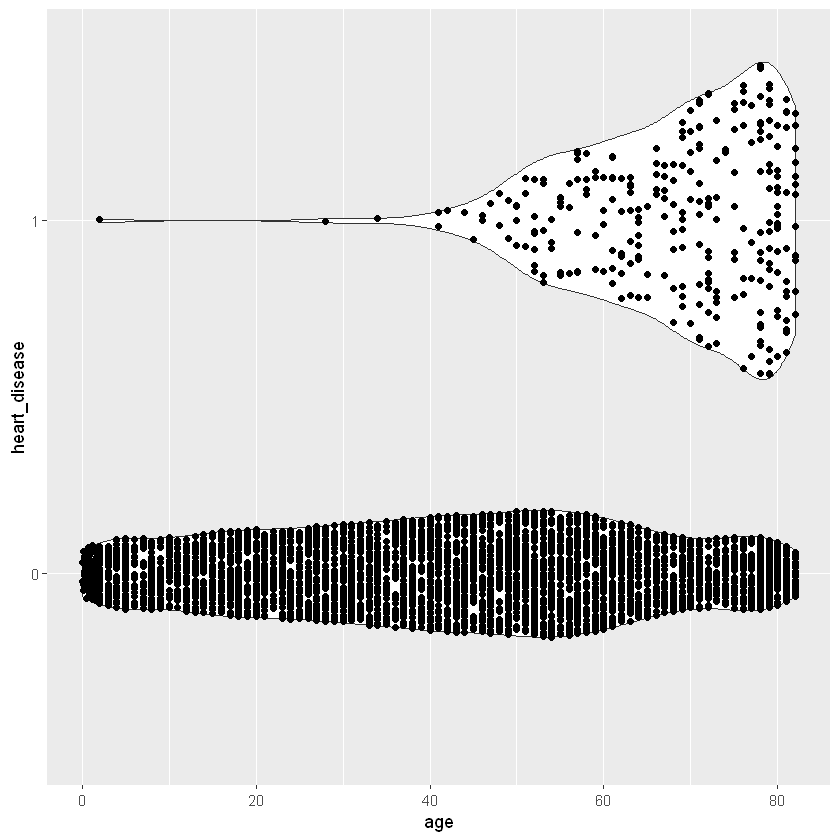

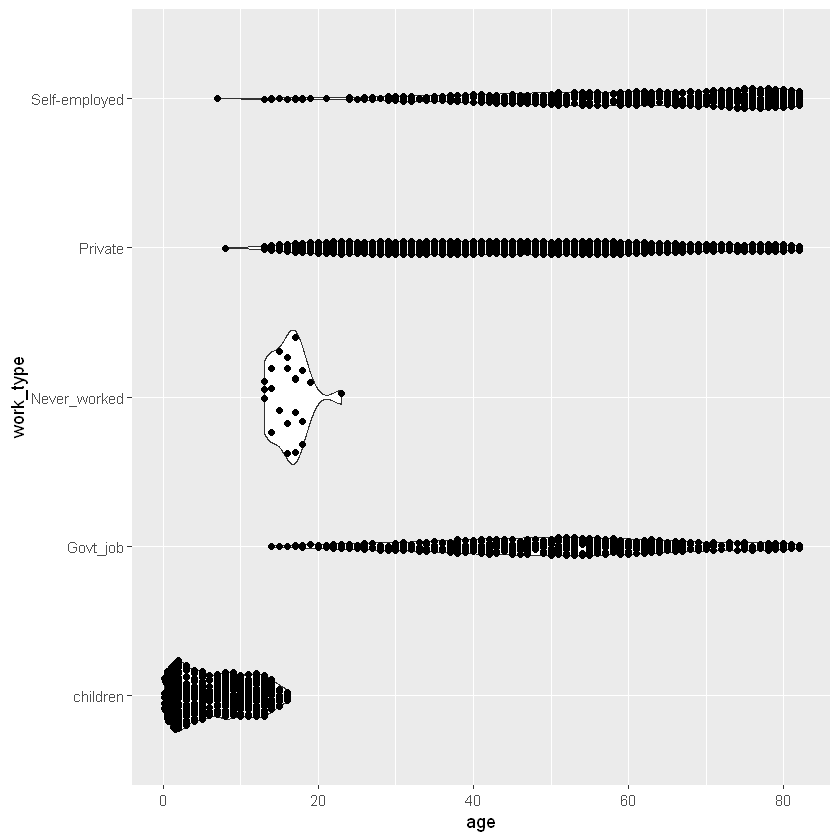

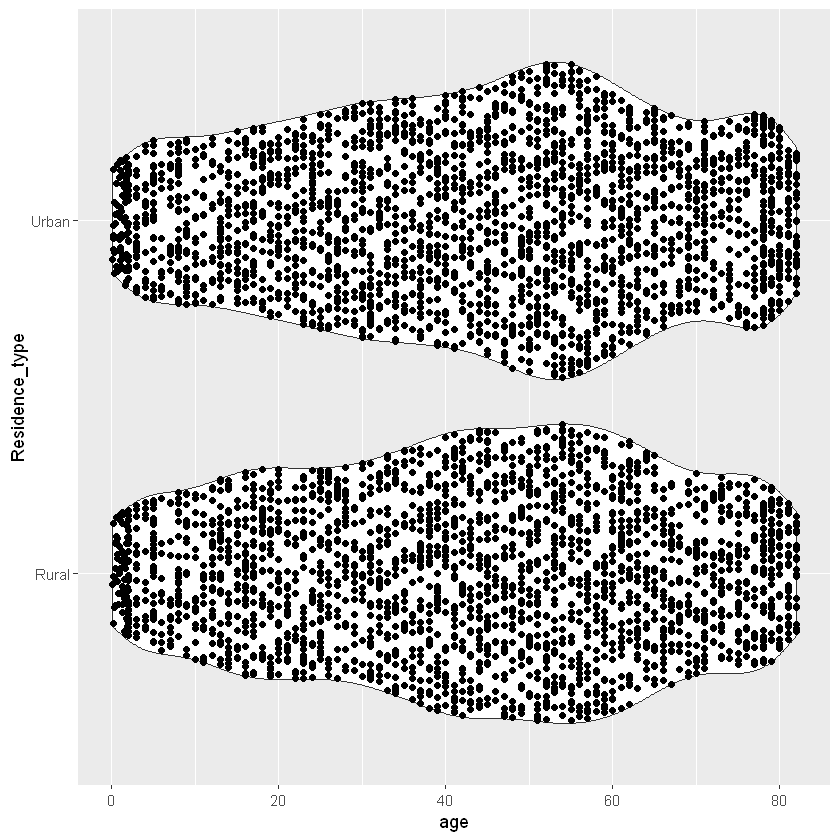

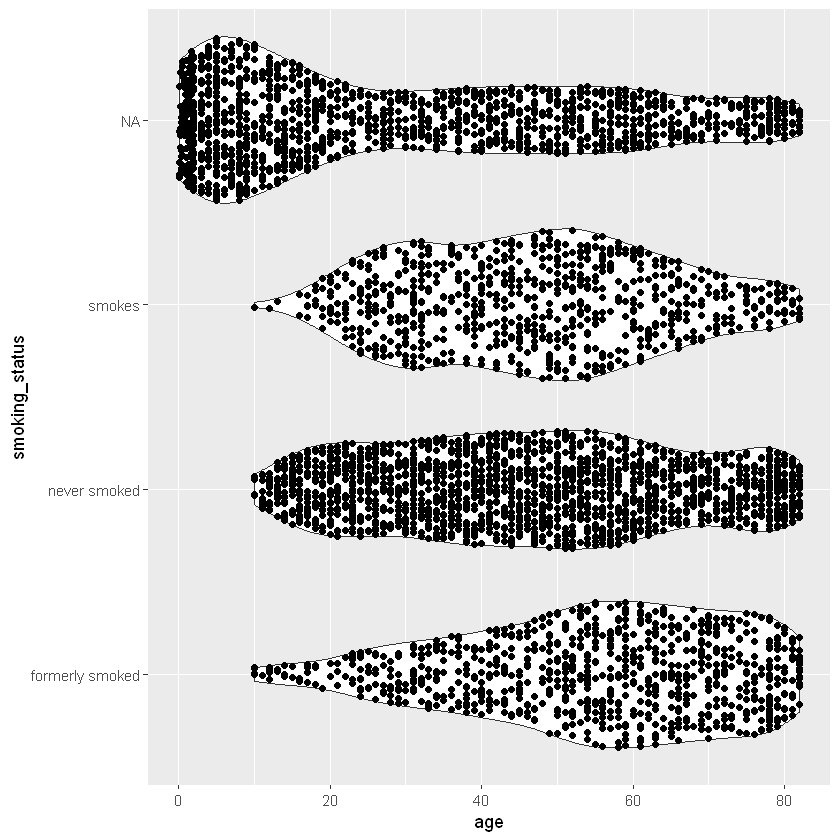

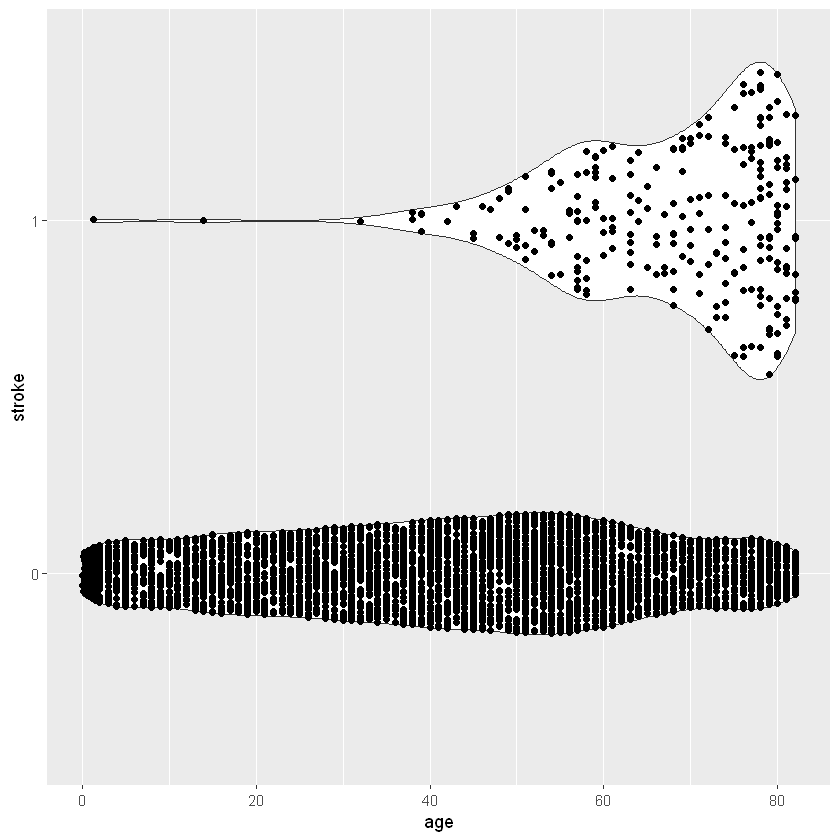

In [49]:
age_compare = function(df, categoric, namecat) {
    ggplot(data = df) +
      aes(y = age, x = categoric) +
      labs(y="age", x = namecat) +
      geom_violin() +
      geom_sina() +
      coord_flip()
}

age_compare(df, df$gender,"gender")
age_compare(df, df$ever_married,"ever_married")
age_compare(df, as.factor(df$hypertension),"hypertension")
age_compare(df, as.factor(df$heart_disease),"heart_disease")
age_compare(df, df$work_type,"work_type")
age_compare(df, df$Residence_type,"Residence_type")
age_compare(df, df$smoking_status,"smoking_status")
age_compare(df, as.factor(df$stroke),"stroke")

###  Numerické VS numerické <a class="anchor" id="subsection_2_6_2"></a>

Warning message:
"Removed 201 rows containing missing values (geom_point)."

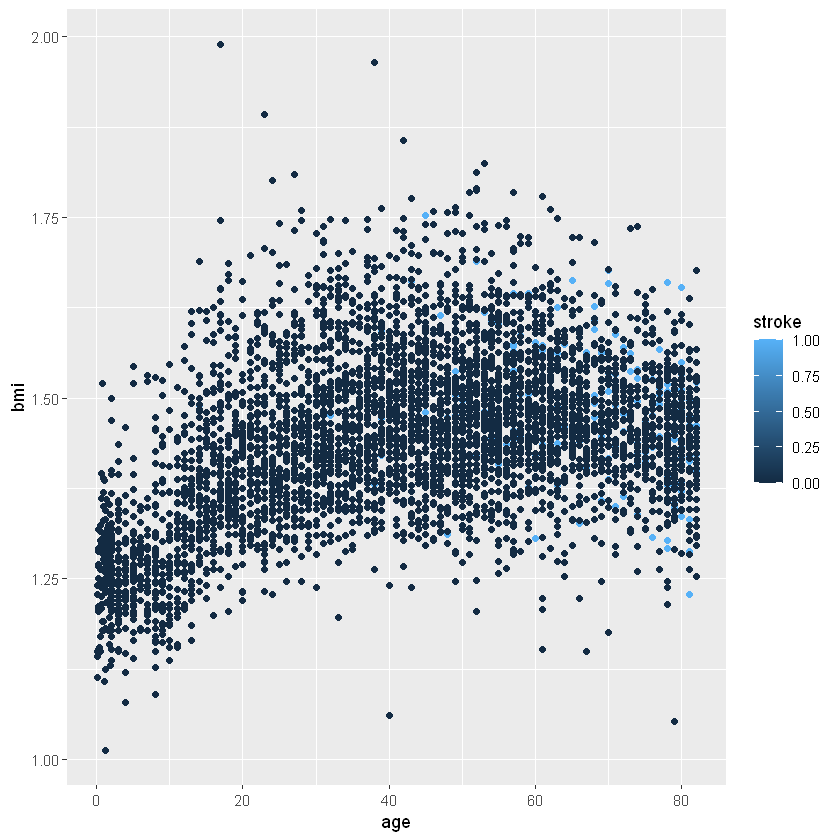

Warning message:
"Removed 201 rows containing missing values (geom_point)."

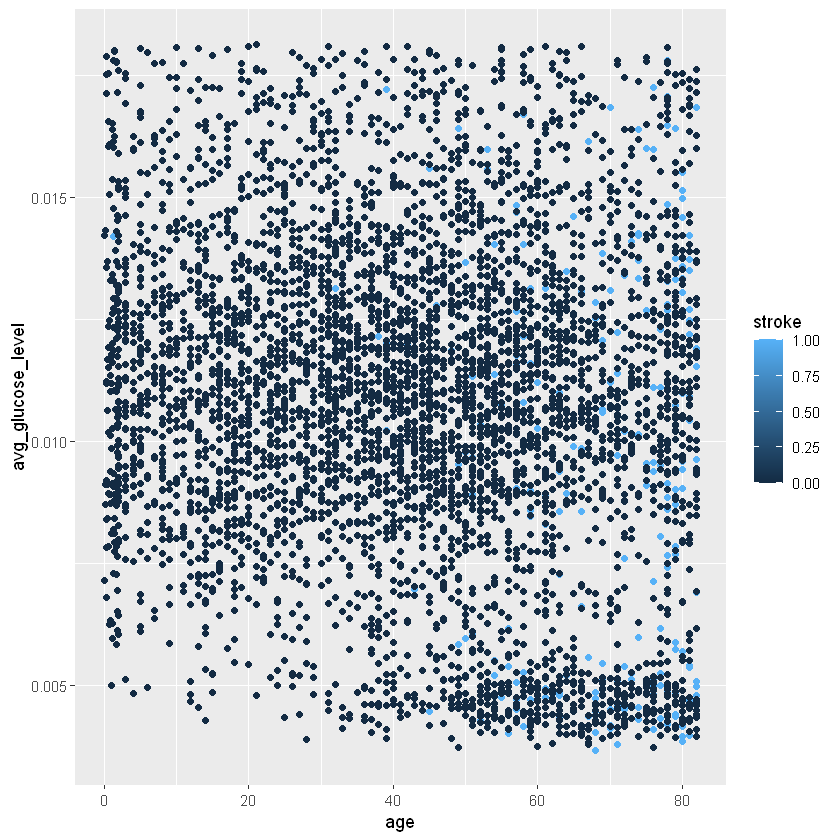

Warning message:
"Removed 201 rows containing missing values (geom_point)."

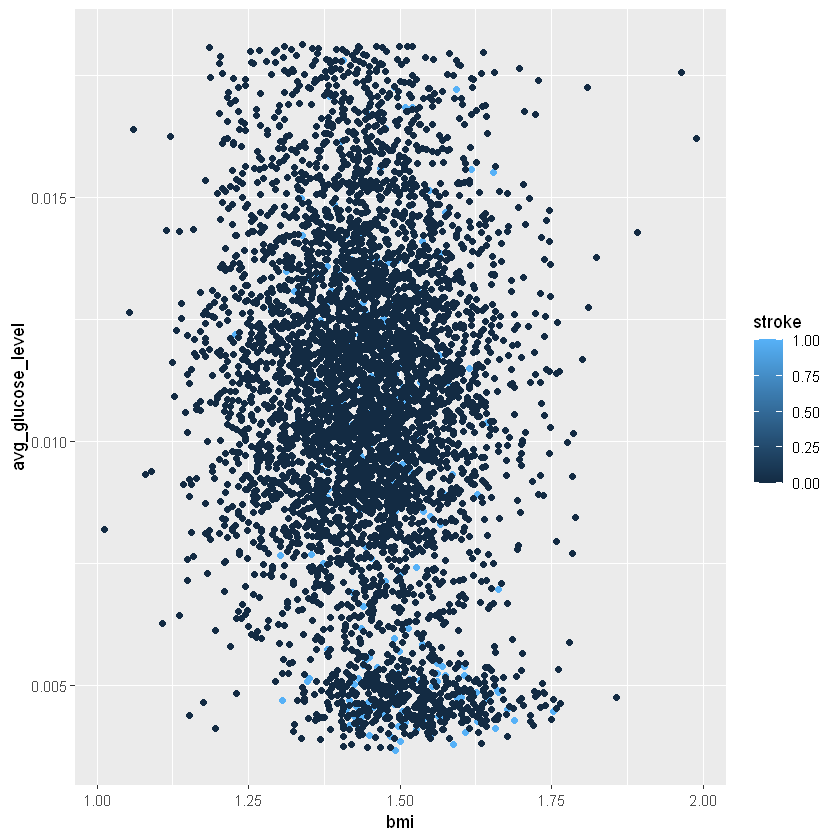

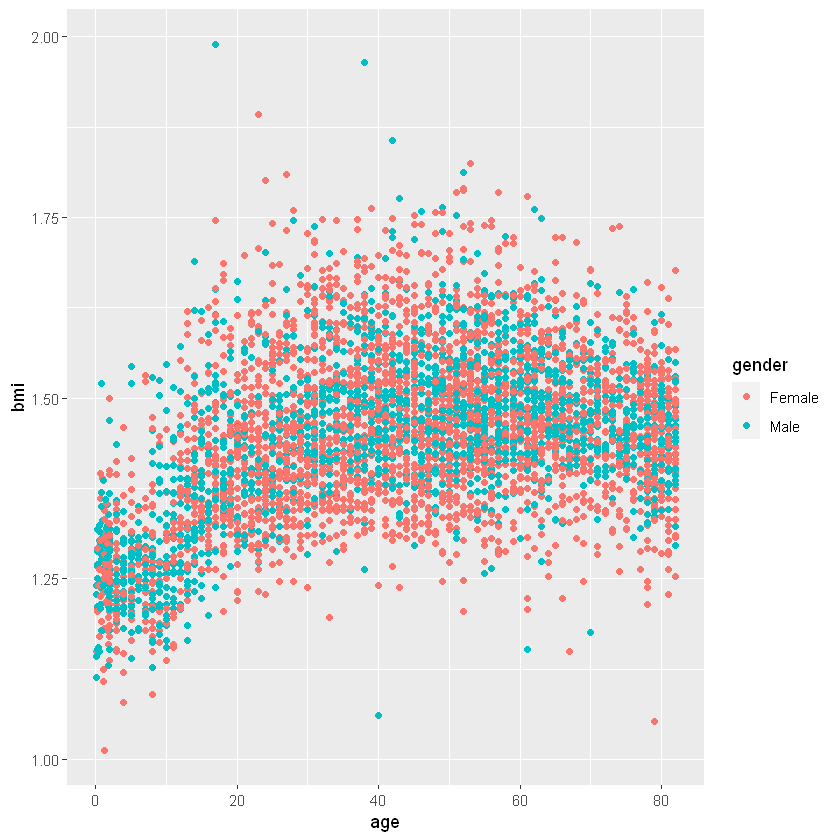

Warning message:
"Removed 201 rows containing missing values (geom_point)."

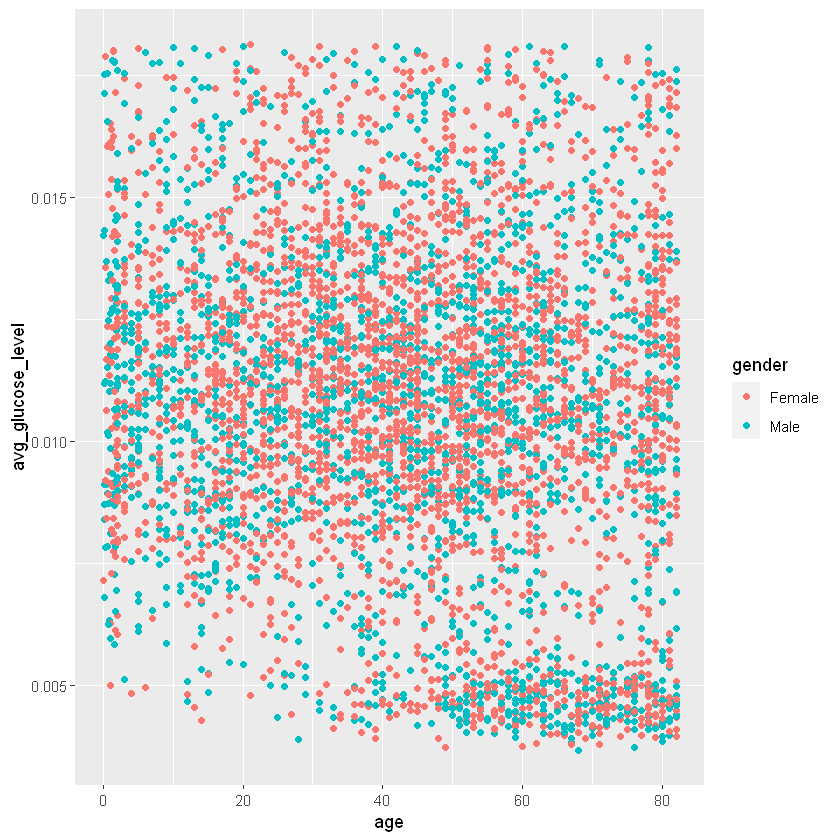

Warning message:
"Removed 201 rows containing missing values (geom_point)."

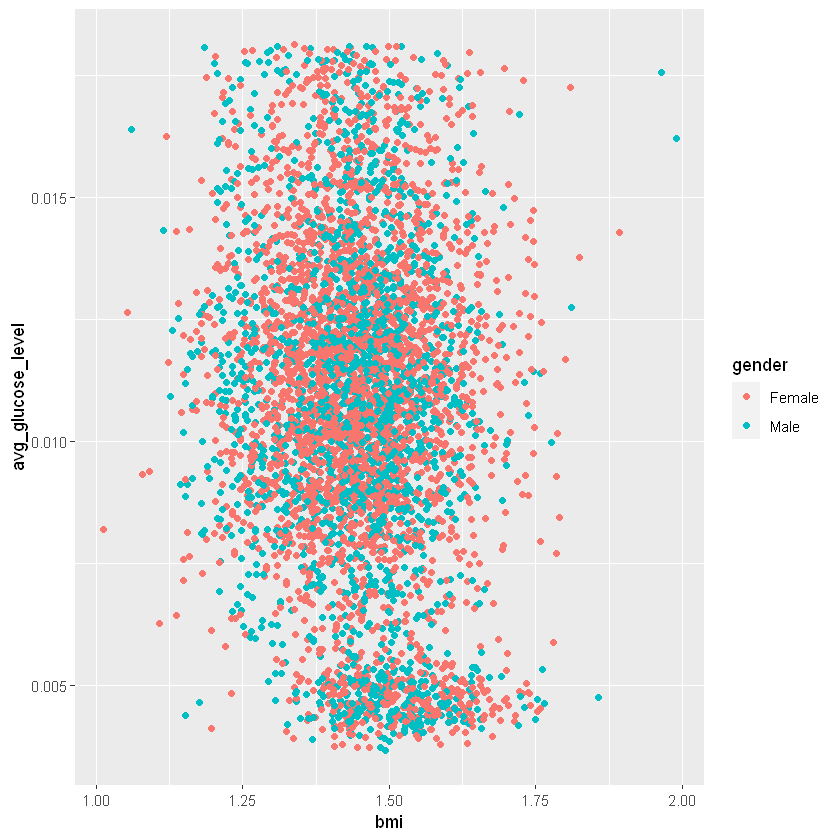

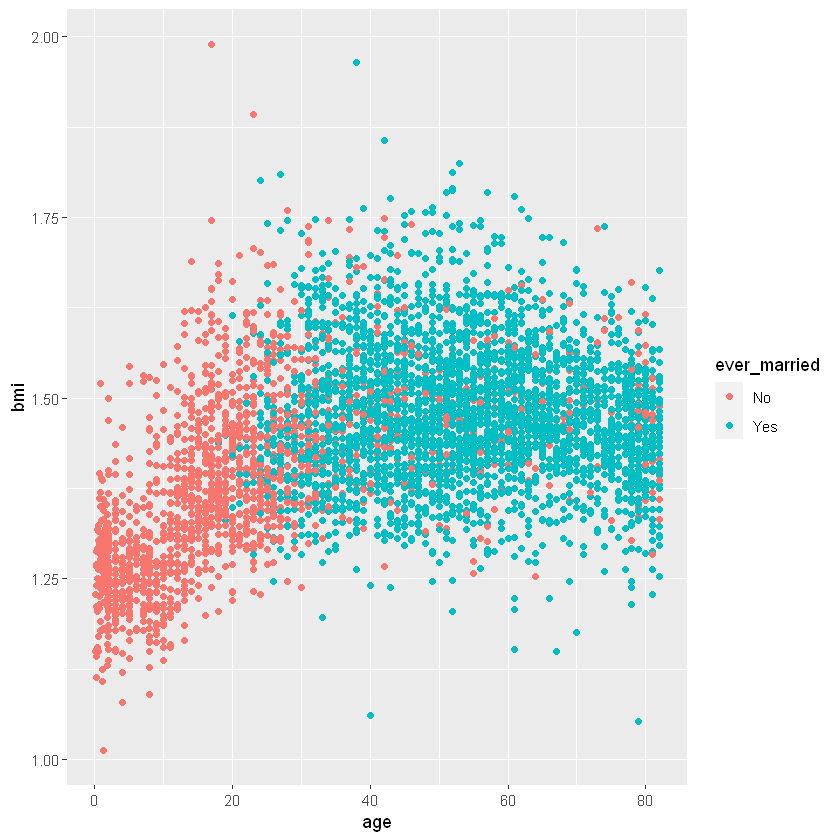

Warning message:
"Removed 201 rows containing missing values (geom_point)."

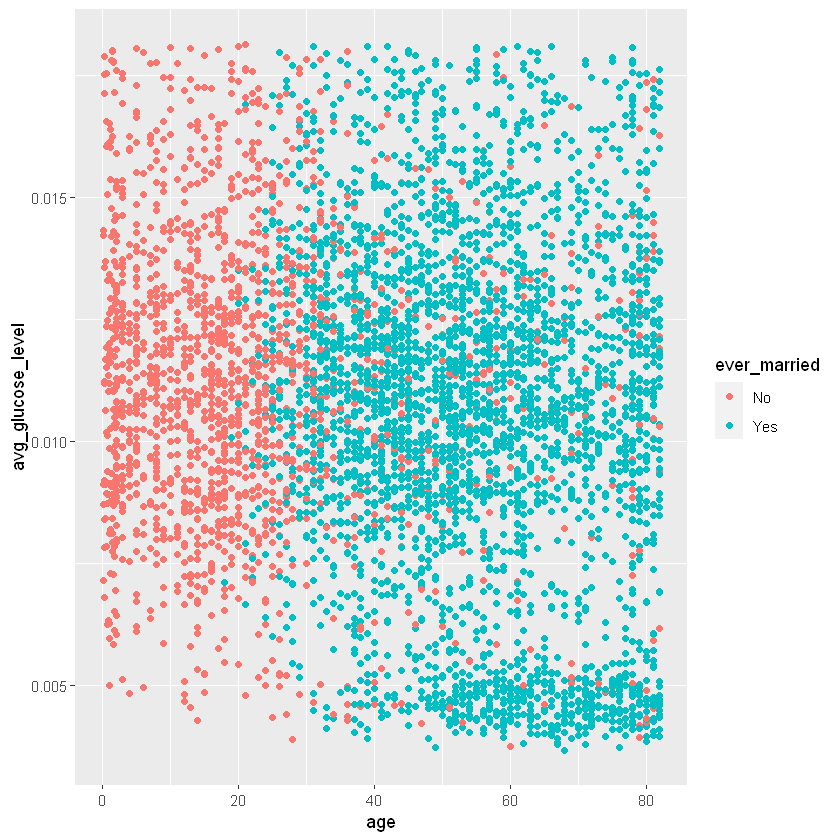

Warning message:
"Removed 201 rows containing missing values (geom_point)."

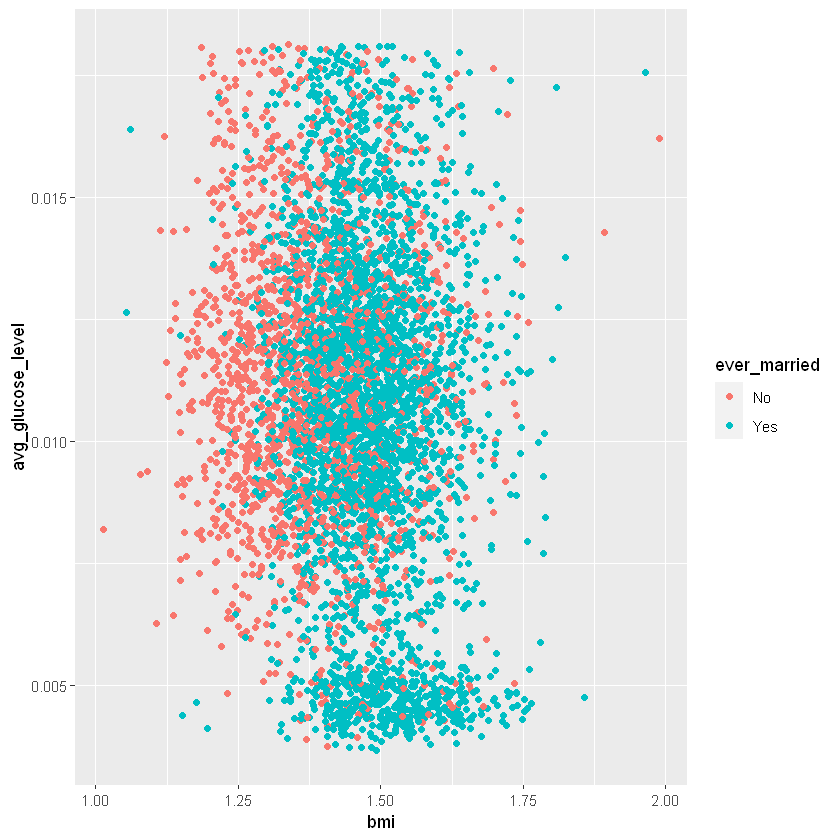

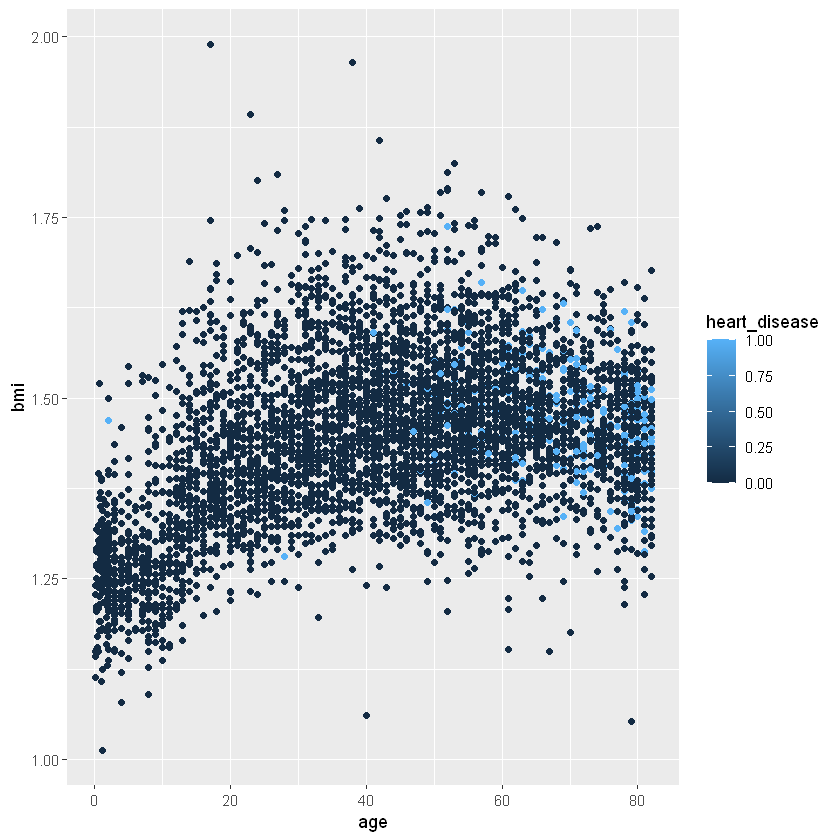

Warning message:
"Removed 201 rows containing missing values (geom_point)."

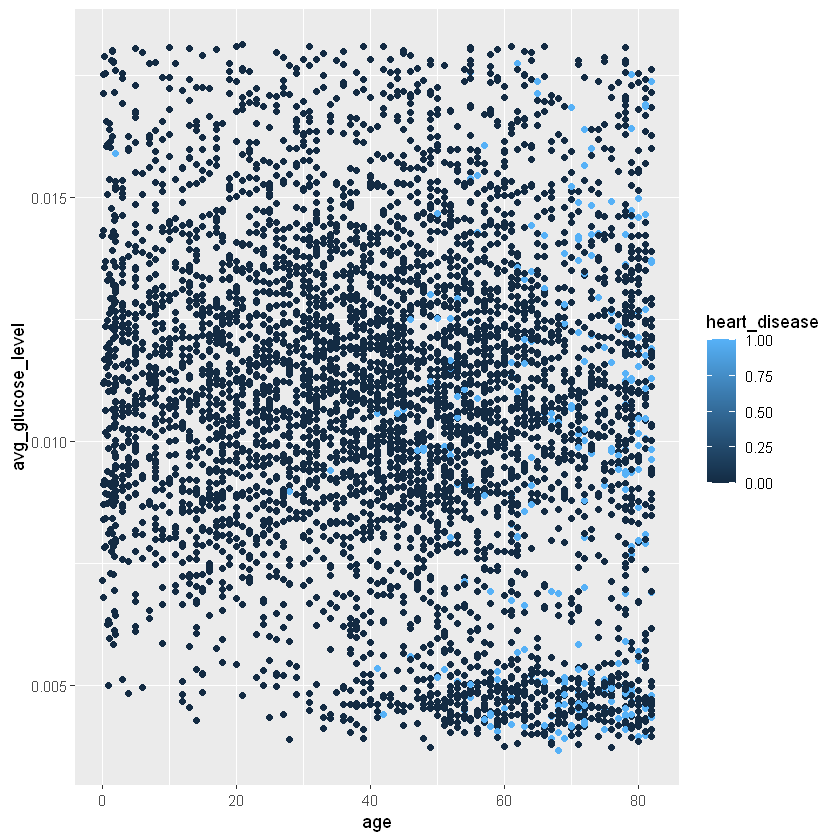

Warning message:
"Removed 201 rows containing missing values (geom_point)."

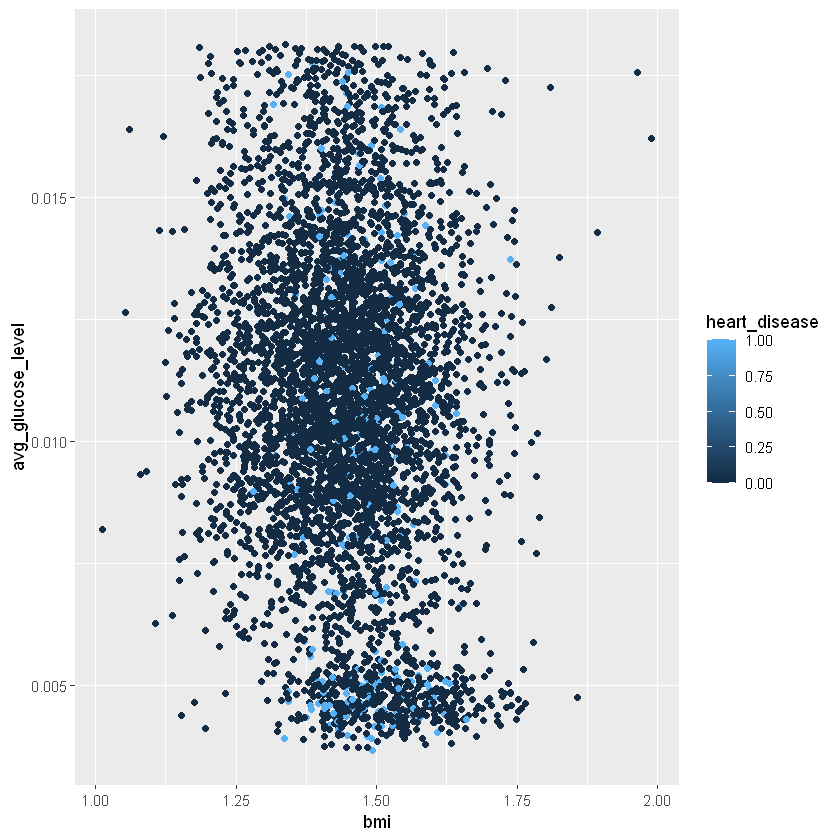

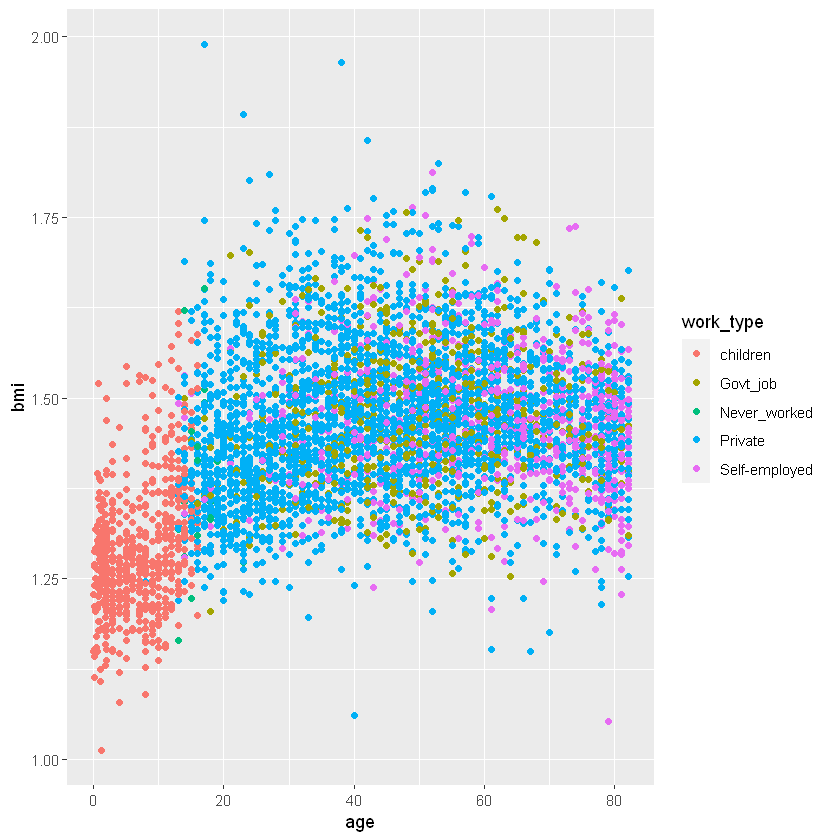

Warning message:
"Removed 201 rows containing missing values (geom_point)."

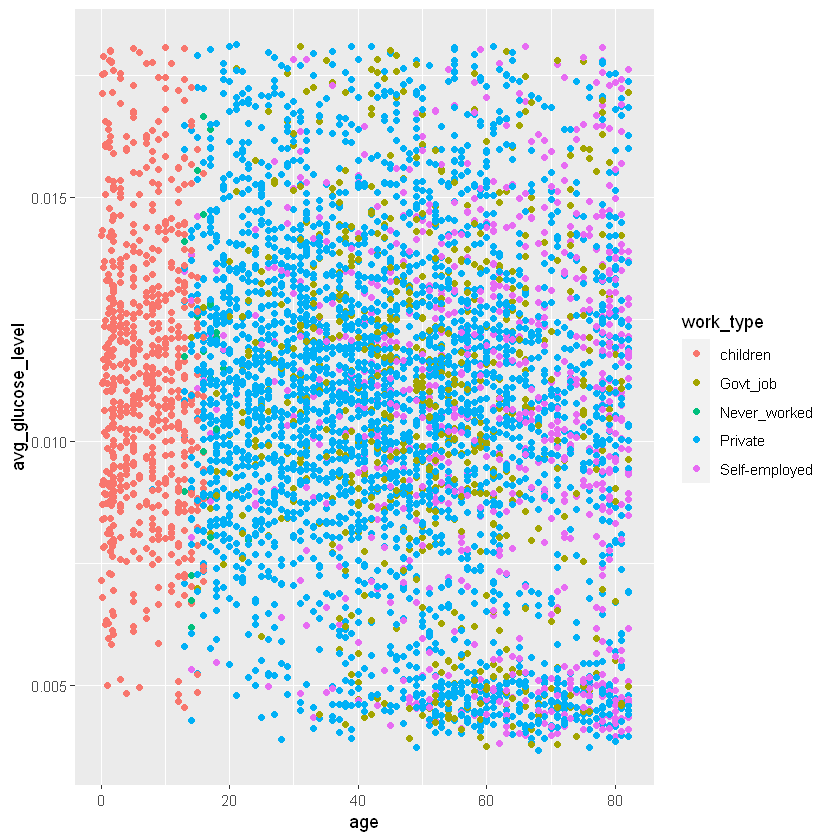

Warning message:
"Removed 201 rows containing missing values (geom_point)."

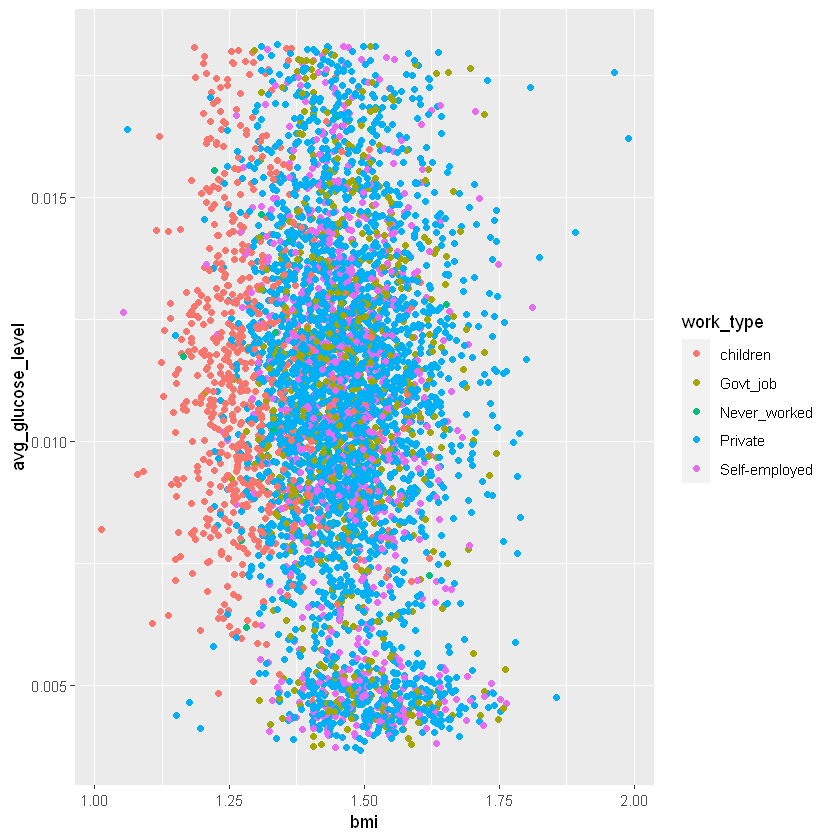

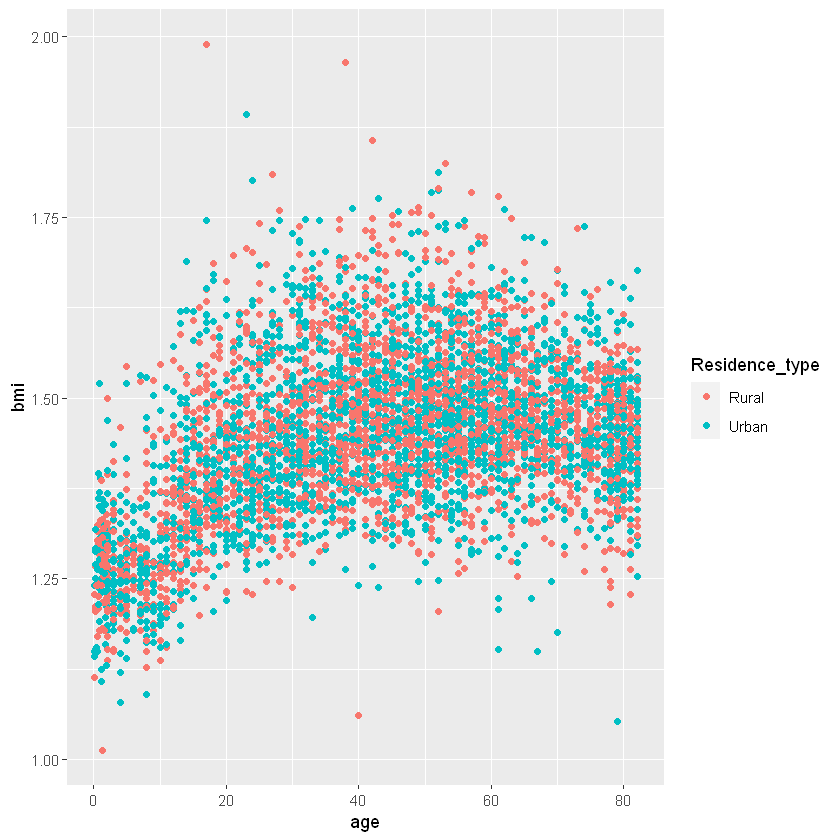

Warning message:
"Removed 201 rows containing missing values (geom_point)."

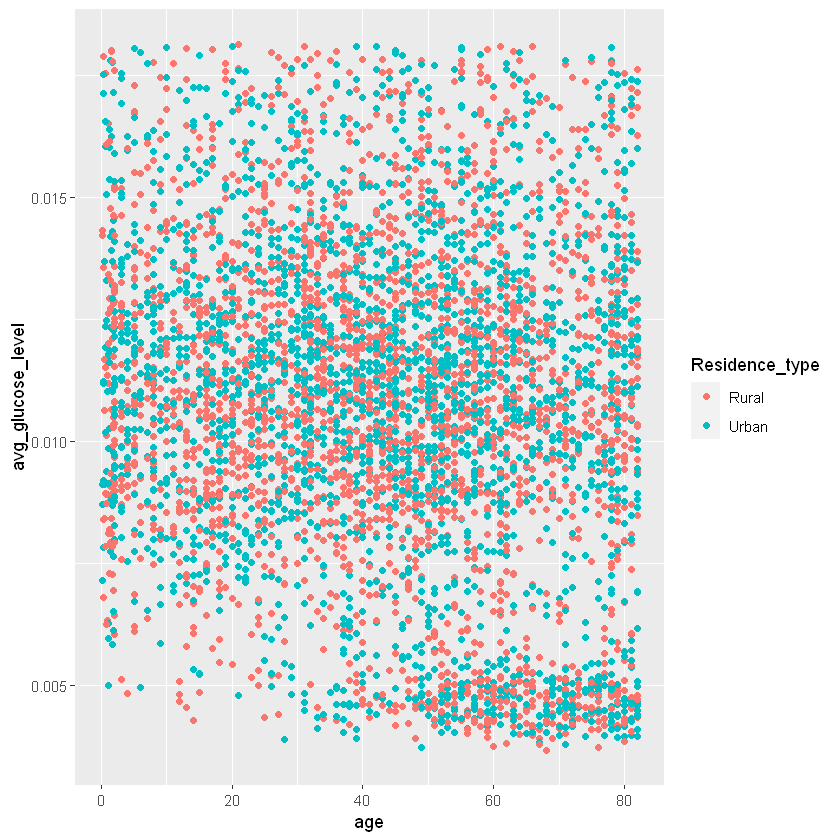

Warning message:
"Removed 201 rows containing missing values (geom_point)."

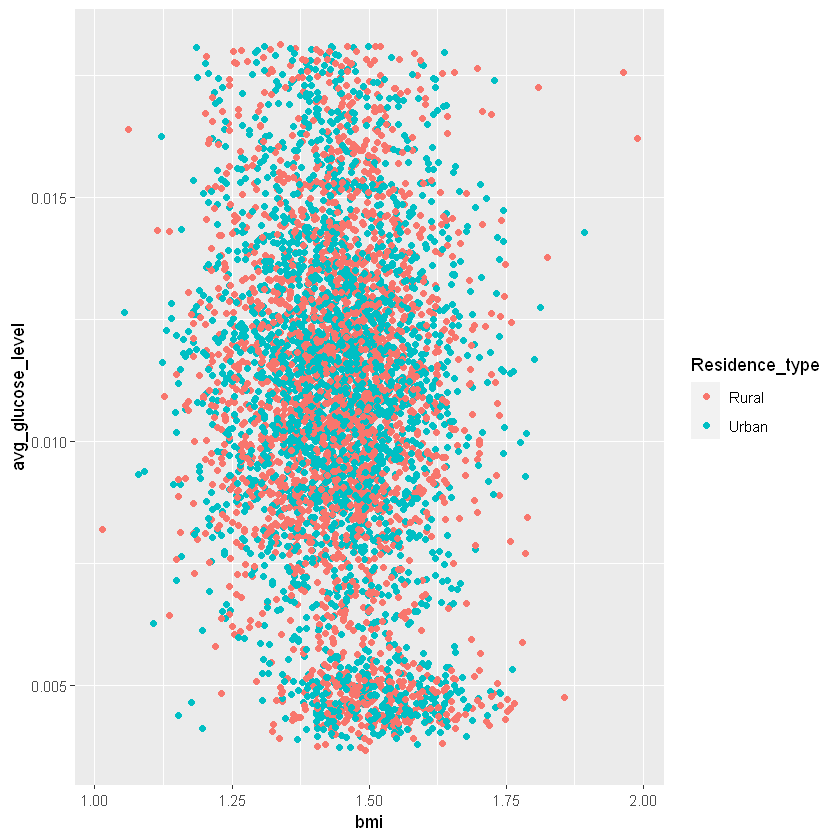

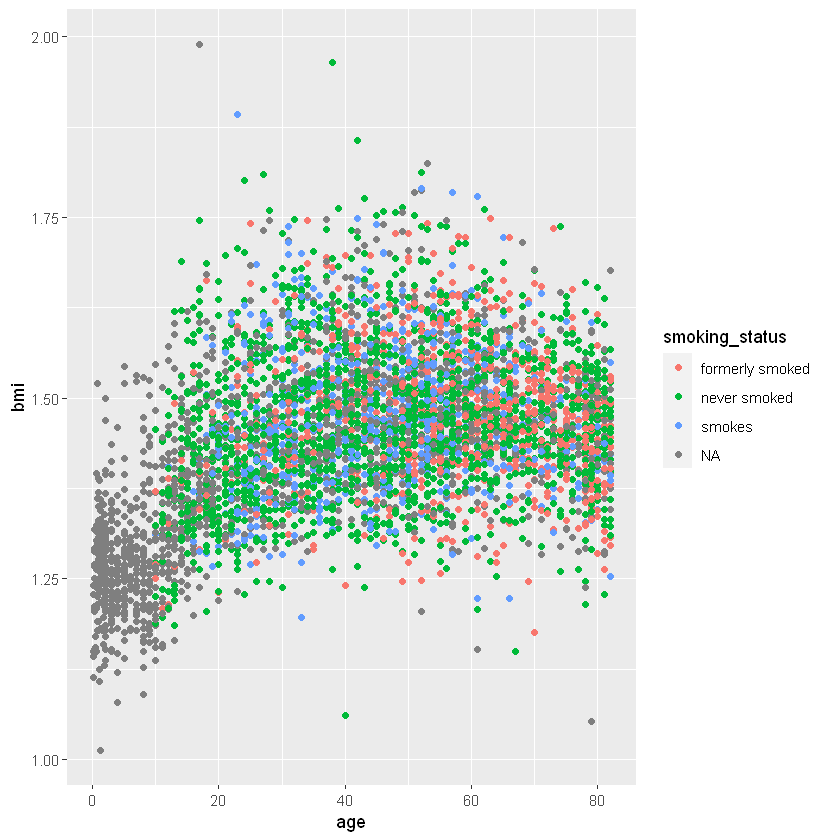

Warning message:
"Removed 201 rows containing missing values (geom_point)."

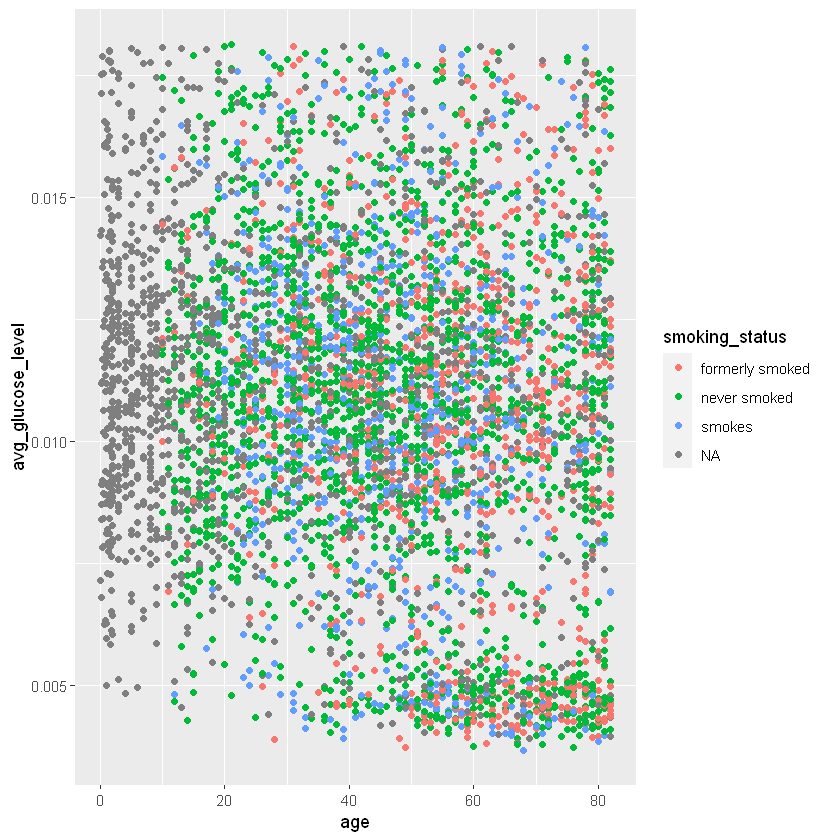

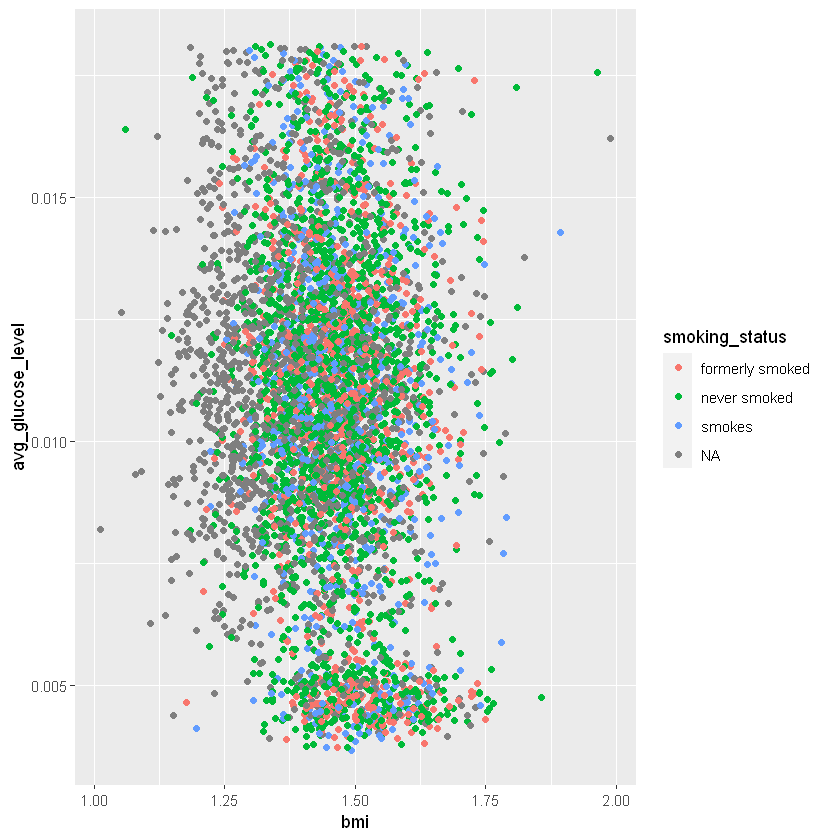

In [50]:
df_num_only = subset(df, select=c("age", "bmi", "avg_glucose_level"))

qplot(age, bmi, data = df, colour = stroke)
qplot(age, avg_glucose_level, data = df, colour = stroke)
qplot(bmi, avg_glucose_level, data = df, colour = stroke)

qplot(age, bmi, data = df, colour = gender)
qplot(age, avg_glucose_level, data = df, colour = gender)
qplot(bmi, avg_glucose_level, data = df, colour = gender)

qplot(age, bmi, data = df, colour = ever_married)
qplot(age, avg_glucose_level, data = df, colour = ever_married)
qplot(bmi, avg_glucose_level, data = df, colour = ever_married)

qplot(age, bmi, data = df, colour = heart_disease)
qplot(age, avg_glucose_level, data = df, colour = heart_disease)
qplot(bmi, avg_glucose_level, data = df, colour = heart_disease)

qplot(age, bmi, data = df, colour = work_type)
qplot(age, avg_glucose_level, data = df, colour = work_type)
qplot(bmi, avg_glucose_level, data = df, colour = work_type)

qplot(age, bmi, data = df, colour = Residence_type)
qplot(age, avg_glucose_level, data = df, colour = Residence_type)
qplot(bmi, avg_glucose_level, data = df, colour = Residence_type)

qplot(age, bmi, data = df, colour = smoking_status)
qplot(age, avg_glucose_level, data = df, colour = smoking_status)
qplot(bmi, avg_glucose_level, data = df, colour = smoking_status)

### Kategorické a binárne VS kategorické a binárne <a class="anchor" id="subsection_2_6_3"></a>

In [51]:
compare_categoric = function(cat1, cat2, lab1, lab2)
{
    dat <- prop.table(table(cat1, cat2))
    names(dimnames(dat)) <- c(lab1, lab2)
    dat       
}

compare_categoric(df$gender, df$ever_married,"gender","ever_married")
compare_categoric(df$gender, as.factor(df$hypertension),"gender","hypertension")
compare_categoric(df$gender, as.factor(df$heart_disease),"gender","heart_disease")
compare_categoric(df$gender, df$work_type,"gender","work_type")
compare_categoric(df$gender, df$Residence_type,"gender","Residence_type")
compare_categoric(df$gender, df$smoking_status,"gender","smoking_status")
compare_categoric(df$gender, as.factor(df$stroke),"gender","stroke")

compare_categoric(df$ever_married, as.factor(df$hypertension),"ever_married","hypertension")
compare_categoric(df$ever_married, as.factor(df$heart_disease),"ever_married","heart_disease")
compare_categoric(df$ever_married, df$work_type,"ever_married","work_type")
compare_categoric(df$ever_married, df$Residence_type,"ever_married","Residence_type")
compare_categoric(df$ever_married, df$smoking_status,"ever_married","smoking_status")
compare_categoric(df$ever_married, as.factor(df$stroke),"ever_married","stroke")

compare_categoric(as.factor(df$hypertension), as.factor(df$heart_disease),"hypertension","heart_disease")
compare_categoric(as.factor(df$hypertension), df$work_type,"hypertension","work_type")
compare_categoric(as.factor(df$hypertension), df$Residence_type,"hypertension","Residence_type")
compare_categoric(as.factor(df$hypertension), df$smoking_status,"hypertension","smoking_status")
compare_categoric(as.factor(df$hypertension), as.factor(df$stroke),"hypertension","stroke")

compare_categoric(as.factor(df$heart_disease), df$work_type,"heart_disease","work_type")
compare_categoric(as.factor(df$heart_disease), df$Residence_type,"heart_disease","Residence_type")
compare_categoric(as.factor(df$heart_disease), df$smoking_status,"heart_disease","smoking_status")
compare_categoric(as.factor(df$heart_disease), as.factor(df$stroke),"heart_disease","stroke")

compare_categoric(df$work_type, df$Residence_type,"work_type","Residence_type")
compare_categoric(df$work_type, df$smoking_status,"work_type","smoking_status")
compare_categoric(df$work_type, as.factor(df$stroke),"work_type","stroke")

compare_categoric(df$Residence_type, df$smoking_status,"Residence_type","smoking_status")
compare_categoric(df$Residence_type, as.factor(df$stroke),"Residence_type","stroke")

compare_categoric(df$smoking_status, as.factor(df$stroke),"smoking_status","stroke")

        ever_married
gender          No       Yes
  Female 0.1943629 0.3916618
  Male   0.1493443 0.2646310
  Other  0.0000000 0.0000000

        hypertension
gender            0          1
  Female 0.53200235 0.05402231
  Male   0.37052261 0.04345273
  Other  0.00000000 0.00000000

        heart_disease
gender            0          1
  Female 0.56390683 0.02211783
  Male   0.38207086 0.03190448
  Other  0.00000000 0.00000000

        work_type
gender      children    Govt_job Never_worked     Private Self-employed
  Female 0.063808965 0.078097475  0.002153063 0.343315717   0.098649442
  Male   0.070659620 0.050499119  0.002153063 0.229007634   0.061655901
  Other  0.000000000 0.000000000  0.000000000 0.000000000   0.000000000

        Residence_type
gender       Rural     Urban
  Female 0.2867489 0.2992758
  Male   0.2051282 0.2088471
  Other  0.0000000 0.0000000

        smoking_status
gender   formerly smoked never smoked     smokes
  Female      0.13380084   0.34474053 0.12678822
  Male        0.11416550   0.18597475 0.09453015
  Other       0.00000000   0.00000000 0.00000000

        stroke
gender            0          1
  Female 0.55842631 0.02759836
  Male   0.39283617 0.02113917
  Other  0.00000000 0.00000000

            hypertension
ever_married          0          1
         No  0.33333333 0.01037385
         Yes 0.56919162 0.08710119

            heart_disease
ever_married           0           1
         No  0.337443727 0.006263457
         Yes 0.608533960 0.047758857

            work_type
ever_married    children    Govt_job Never_worked     Private Self-employed
         No  0.134468585 0.022900763  0.004306126 0.160501077   0.021530632
         Yes 0.000000000 0.105695831  0.000000000 0.411822274   0.138774711

            Residence_type
ever_married     Rural     Urban
         No  0.1704835 0.1732237
         Yes 0.3213936 0.3348992

            smoking_status
ever_married formerly smoked never smoked     smokes
         No       0.04095372   0.14866760 0.05021038
         Yes      0.20701262   0.38204769 0.17110799

            stroke
ever_married           0           1
         No  0.338030926 0.005676258
         Yes 0.613231552 0.043061264

            heart_disease
hypertension          0          1
           0 0.86102956 0.04149540
           1 0.08494813 0.01252691

            work_type
hypertension    children    Govt_job Never_worked     Private Self-employed
           0 0.134468585 0.114308084  0.004306126 0.517322372   0.132119789
           1 0.000000000 0.014288510  0.000000000 0.055000979   0.028185555

            Residence_type
hypertension      Rural      Urban
           0 0.44274809 0.45977686
           1 0.04912899 0.04834606

            smoking_status
hypertension formerly smoked never smoked     smokes
           0      0.21430575   0.46563815 0.19495091
           1      0.03366059   0.06507714 0.02636746

            stroke
hypertension          0          1
           0 0.86670581 0.03581914
           1 0.08455666 0.01291838

             work_type
heart_disease    children    Govt_job Never_worked     Private Self-employed
            0 0.134272852 0.121550206  0.004306126 0.541397534   0.144450969
            1 0.000195733 0.007046389  0.000000000 0.030925817   0.015854375

             Residence_type
heart_disease      Rural      Urban
            0 0.46564885 0.48032883
            1 0.02622822 0.02779409

             smoking_status
heart_disease formerly smoked never smoked     smokes
            0      0.22636746   0.50546985 0.20420757
            1      0.02159888   0.02524544 0.01711080

             stroke
heart_disease           0           1
            0 0.906439616 0.039538070
            1 0.044822862 0.009199452

               Residence_type
work_type             Rural       Urban
  children      0.066549227 0.067919358
  Govt_job      0.061068702 0.067527892
  Never_worked  0.001370131 0.002935995
  Private       0.285965942 0.286357408
  Self-employed 0.076923077 0.083382267

               smoking_status
work_type       formerly smoked never smoked       smokes
  children         0.0036465638 0.0151472651 0.0005610098
  Govt_job         0.0373071529 0.0791023843 0.0336605891
  Never_worked     0.0000000000 0.0039270687 0.0000000000
  Private          0.1486676017 0.3396914446 0.1523141655
  Self-employed    0.0583450210 0.0928471248 0.0347826087

               stroke
work_type                 0           1
  children      0.134077119 0.000391466
  Govt_job      0.122137405 0.006459190
  Never_worked  0.004306126 0.000000000
  Private       0.543159131 0.029164220
  Self-employed 0.147582697 0.012722646

              smoking_status
Residence_type formerly smoked never smoked    smokes
         Rural       0.1197756    0.2695652 0.1018233
         Urban       0.1281907    0.2611501 0.1194951

              stroke
Residence_type          0          1
         Rural 0.46956352 0.02231356
         Urban 0.48169896 0.02642396

                 stroke
smoking_status             0          1
  formerly smoked 0.22833100 0.01963534
  never smoked    0.50546985 0.02524544
  smokes          0.20953717 0.01178121

# Čistenie dát pre ďalšie analýzy <a class="anchor" id="chapter3"></a>

## Náhrada NA hodnoty <a class="anchor" id="section_3_1"></a> 

### smoking_status <a class="anchor" id="section_3_1_1"></a> 

In [52]:
stat <- na.omit(df$smoking_status)
print(paste("Pocet 'smokes': ", toString(nrow(df[df$smoking_status == "smokes" & !is.na(df$smoking_status), ]))))
print(paste("Pocet 'never smoked': ", toString(nrow(df[df$smoking_status == 'never smoked' & !is.na(df$smoking_status), ]))))
print(paste("Pocet 'formerly smoked': ", toString(nrow(df[df$smoking_status == 'formerly smoked' & !is.na(df$smoking_status), ]))))
print(paste("Pocet 'NA': ", toString(nrow(df[is.na(df$smoking_status), ]))))


[1] "Pocet 'smokes':  789"
[1] "Pocet 'never smoked':  1892"
[1] "Pocet 'formerly smoked':  884"
[1] "Pocet 'NA':  1544"


Zmenime NA hodnoty na 'never smoked', kedze ta je najcastejsia hodnota.


In [53]:
#Kedze aj tak zmenime NA hodnoty na 'never smoked', nema zmysel doplnat podla veku 
#df$smoking_status <- ifelse( (is.na(df$smoking_status) & df$age < 18), "never smoked", as.character(df$smoking_status))
df$smoking_status <- ifelse( (is.na(df$smoking_status)), "never smoked", as.character(df$smoking_status))


### BMI <a class="anchor" id="section_3_1_2"></a> 

Pocet "NA" BMI pred

In [54]:
nrow(df[is.na(df$bmi), ])

[1] 201

Priemer v prípade BMI je:

In [55]:
bmi_no_na <- na.omit(df$bmi)
apply(bmi_no_na, 2, mean)

bmi 
1.445535

Median v prípade BMI je:

In [56]:
apply(bmi_no_na, 2, median)

bmi 
1.448706

Kedze tie hodnoty su velmi podobne, NA nahradime priemerom

In [57]:
mean_bmi <- apply(bmi_no_na, 2, mean)
df$bmi <- ifelse(is.na(df$bmi) , mean_bmi, df$bmi)

Pocet "NA" BMI po 

In [58]:
nrow(df[is.na(df$bmi), ])

[1] 0

## Vytvorenie tréningového a testovacieho dátasetu <a class="anchor" id="section_3_2"></a>


In [59]:
size <- floor(0.75 * nrow(df))
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

Pocet záznamov v train datasete, kde ludia mali mrtvicu:

In [60]:
nrow(train[train$stroke == 1, ])

[1] 182

Pocet záznamov v test datasete, kde ludia mali mrtvicu:

In [61]:
nrow(test[test$stroke == 1, ])

[1] 67

# Štatistické učenie, zhlukové analýzy a nachádzanie vnútorných vzorcov v dátach  <a class="anchor" id="chapter4"></a>

In [62]:
# TODO

# Bayesovská štatistika  <a class="anchor" id="chapter5"></a>

In [63]:
# TODO